<a href="https://colab.research.google.com/github/lreinosoh/lr/blob/main/Anexo_E_RLM_Proyecto_Grado_LA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Para gráficos y data.frames
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

# Dividir los datos entrenamiento y prueba
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# Para preprocesamiento: escalador
from sklearn.preprocessing import StandardScaler

# Modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.svm          import SVR
from sklearn.neighbors    import KNeighborsRegressor
from sklearn.tree         import DecisionTreeRegressor
from sklearn.ensemble     import RandomForestRegressor
# Métrica
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

Carga de datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/IV SEM/PROFUNDIZACION 2/BASE ESTUDIANTES SISTEMAS V3.xlsx") #andres felipe
#datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V3.xlsx") #Lau

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

Ajuste de variable calificación para dejar solo dos valores: Supero: SP y no superó NS
Ajuste la variable Periodo para que sea String

In [ ]:
datos['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS'}, inplace=True)
datos['PERIODO']= datos['PERIODO'].astype(str)

Creo un dataframe filtrado con el plan de estudios de interés, y selecciono variables iniciales:

In [ ]:
plan_filtrado = datos[datos['PLAN 4064'] == 'SI']
variables_seleccionadas = ['PERIODO','CÓDIGO', 'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'NOTAS PRIMER CORTE','NOTAS SEGUNDO CORTE','NOTAS EXAMEN', 'DEFINITIVA', 'CALIFICACIÓN','PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'DESCRIPCIÓN','DOCUMENTO ESTUDIANTE','GÉNERO']

In [ ]:
datos1= plan_filtrado[variables_seleccionadas]
datos1.head(5)

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,PREREQUISITO2_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 2,DESCRIPCIÓN,DOCUMENTO ESTUDIANTE,GÉNERO
0,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,3.5,3.5,4.0,3.7,SP,3.69,3.71,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,43390852.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1016014851,Masculino
1,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,2.0,4.0,5.0,3.8,SP,4.05,3.49,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1026289722,Masculino
2,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,2.0,3.0,1.5,2.1,NS,3.20,3.47,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1022327856,Masculino
3,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,3.5,2.5,3.0,3.0,SP,4.00,3.54,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1010205208,Masculino
4,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,4.0,4.0,3.0,3.6,SP,4.08,3.77,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1022385102,Masculino


In [ ]:
datos1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8824 entries, 0 to 8823
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PERIODO                         8824 non-null   object 
 1   CÓDIGO                          8824 non-null   int64  
 2   ASIGNATURA                      8824 non-null   object 
 3   CRÉDITOS TEÓRICOS               8824 non-null   int64  
 4   NOTAS PRIMER CORTE              6932 non-null   float64
 5   NOTAS SEGUNDO CORTE             6895 non-null   float64
 6   NOTAS EXAMEN                    6903 non-null   float64
 7   DEFINITIVA                      8325 non-null   float64
 8   CALIFICACIÓN                    8824 non-null   object 
 9   PROMEDIO SEMESTRAL              8420 non-null   float64
 10  PROMEDIO ACUMULADO              8420 non-null   float64
 11  PREREQUISITO1_COD               8824 non-null   float64
 12  PREREQUISITO1_ASIGNATURA        8824 no

Convierto la variable CALIFICACIÓN en una variable dummie_ SP = 1 y NS = 0

In [ ]:
datos1['CALIFICACIÓN_dummie'] = datos1['CALIFICACIÓN'].eq('SP').astype(int)

<ipython-input-23-219608095a8b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos1['CALIFICACIÓN_dummie'] = datos1['CALIFICACIÓN'].eq('SP').astype(int)


In [ ]:
datos1.head(5)

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,...,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,PREREQUISITO2_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 2,DESCRIPCIÓN,DOCUMENTO ESTUDIANTE,GÉNERO,CALIFICACIÓN_dummie
0,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,3.5,3.5,4.0,3.7,SP,3.69,...,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,43390852.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1016014851,Masculino,1
1,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,2.0,4.0,5.0,3.8,SP,4.05,...,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1026289722,Masculino,1
2,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,2.0,3.0,1.5,2.1,NS,3.20,...,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1022327856,Masculino,0
3,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,3.5,2.5,3.0,3.0,SP,4.00,...,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1010205208,Masculino,1
4,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3,4.0,4.0,3.0,3.6,SP,4.08,...,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,40050007.0,ANÁLISIS DE ALGORITMOS,NaN,1.1 INTELIGENCIA ARTIFICIAL.,1022385102,Masculino,1


datos1 es un dataframe detallado con los registros de cada estudiante. A partir de ahí creo un nuevo dataframe con datos agrupados para poder crear mi variable Y (numero de estudiantes matriculados)

In [ ]:
from itertools import count
datos1_consolidado = datos1.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'CRÉDITOS TEÓRICOS': 'mean',
    'NOTAS PRIMER CORTE':'mean',
    'NOTAS SEGUNDO CORTE': 'mean',
    'NOTAS EXAMEN': 'mean',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'PROMEDIO ACUMULADO':'mean',
    'NOTA DEFINITIVA PREREQUISITO 1':'mean',
    'NOTA DEFINITIVA PREREQUISITO 2':'mean',
    'PROMEDIO SEMESTRAL': 'mean',  # Calcula el promedio de 'PROMEDIO SEMESTRAL'
    'PROMEDIO ACUMULADO': 'mean',  # Calcula el promedio de 'PROMEDIO ACUMULADO'
    'DOCUMENTO ESTUDIANTE': 'count',
    'CALIFICACIÓN_dummie':'sum'
}).reset_index()

Renombro mi variable "y"
Renombro la variable de calif. dummie ya que está sumando los 1 = SP (que superaron)
Creo la variable reprobados para contar cuantos no superaron

In [ ]:
datos1_consolidado.rename(columns={'DOCUMENTO ESTUDIANTE': 'MATRICULADOS'}, inplace=True)
datos1_consolidado.rename(columns={'CALIFICACIÓN_dummie': 'N_APROBADOS'}, inplace=True)
datos1_consolidado['REPROBADOS'] = datos1_consolidado['MATRICULADOS'] - datos1_consolidado['N_APROBADOS']
datos1_consolidado['TASA APROBACION']= datos1_consolidado['N_APROBADOS'] / datos1_consolidado['MATRICULADOS']
datos1_consolidado['PERIODO']= datos1_consolidado['PERIODO'].astype(str)

In [ ]:
datos1_consolidado.shape

(224, 16)

In [ ]:
#corr = datos1_consolidado.corr()
#sns.heatmap(corr, annot = True)

**Ejercicio de predicción de 1 curso: Programación Orientada a Objetos (poo)**

In [ ]:
poo = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390843]
poo

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
9,2018-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.209677,2.919355,2.758065,2.941935,3.423214,3.456429,3.476923,3.592308,31,20,11,0.645161
12,2018-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.703704,3.472222,3.333333,3.486111,3.689231,3.614423,3.382609,3.511458,54,41,13,0.759259
20,2019-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.151852,2.983019,2.792453,2.958302,3.452586,3.462931,3.251064,3.389796,58,32,26,0.551724
31,2019-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.242188,3.379688,3.257812,3.289687,3.790286,3.663143,3.280000,3.482000,71,51,20,0.718310
45,2020-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.102500,2.957500,3.185000,3.092000,3.571951,3.486829,3.022353,3.453714,42,29,13,0.690476
63,2020-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.257143,3.691071,3.710714,3.568750,3.662097,3.646129,3.395789,3.546964,62,48,14,0.774194
83,2021-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,2.882609,2.797727,2.527907,2.982895,3.294792,3.461458,3.174444,3.599333,48,20,28,0.416667
105,2021-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.650685,3.228169,3.025352,3.287746,3.321351,3.523649,3.582667,3.645000,77,47,30,0.610390
129,2022-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.265753,3.139726,2.995890,3.159167,3.455195,3.567662,3.702000,3.700405,77,53,24,0.688312
153,2022-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.182051,3.017949,2.781410,3.303910,3.447722,3.573291,3.883826,3.616824,159,97,62,0.610063


In [ ]:
poo.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
count,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.000000,12.000000
mean,43390843.0,3.0,3.344312,3.231112,3.130321,3.298163,3.514322,3.556823,3.468898,3.549875,80.00000,55.833333,24.166667,0.676276
std,0.0,0.0,0.296403,0.306014,0.384332,0.290575,0.147092,0.076923,0.264300,0.087200,42.66785,34.658944,13.590326,0.119100
min,43390843.0,3.0,2.882609,2.797727,2.527907,2.941935,3.294792,3.456429,3.022353,3.389796,31.00000,20.000000,11.000000,0.416667
25%,43390843.0,3.0,3.174501,2.976639,2.789692,3.064724,3.441595,3.480855,3.272766,3.497871,52.50000,31.250000,13.750000,0.610308
50%,43390843.0,3.0,3.249665,3.183948,3.105176,3.288717,3.492489,3.570477,3.436356,3.552252,66.50000,47.500000,23.500000,0.689394
75%,43390843.0,3.0,3.600358,3.498570,3.372287,3.506771,3.594488,3.621578,3.702034,3.603706,92.25000,64.000000,26.500000,0.762993
max,43390843.0,3.0,3.900000,3.691071,3.710714,3.779375,3.790286,3.663143,3.883826,3.700405,159.00000,120.000000,62.000000,0.839161


Dividir el dataframe

In [ ]:
y = poo["MATRICULADOS"]
X = poo[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Escalar los datos

In [ ]:
#scaler = StandardScaler()

In [ ]:
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
#X_scaled.head()

Generar conjunto de entrenamiento y prueba

In [ ]:
#Datos Escalados
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo:

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 158.44042840557165
Coefs: [-38.50340717  -9.63971931   1.49072665]


Coeficientes

In [ ]:
coefs = pd.DataFrame(modelo.coef_.reshape(-1,1), X_train.columns,columns=['Coefs'])
coefs

,Coefs
DEFINITIVA,-38.503407
PROMEDIO SEMESTRAL,-9.639719
N_APROBADOS,1.490727


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
83,48,41.642484
201,138,147.831917
45,42,48.186359


Evaluación del Modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 94.86 %
R^2 prueba 96.97 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 58.45188271369316
RMSE 7.645383097902496


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

In [ ]:
new=np.array([[3.73, 3.53, 112]]) #hacemos la predicción con valores nuevos, para que me prediga el numero de estudiantes matriculados

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([147.75589521])

Probando el modelo sin el periodo 2023-02

In [ ]:
poo1 = datos1_consolidado.loc[(datos1_consolidado['CÓDIGO'] == 43390843) & (datos1_consolidado['PERIODO'] != '2023-02')]
poo1

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
9,2018-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.209677,2.919355,2.758065,2.941935,3.423214,3.456429,3.476923,3.592308,31,20,11,0.645161
12,2018-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.703704,3.472222,3.333333,3.486111,3.689231,3.614423,3.382609,3.511458,54,41,13,0.759259
20,2019-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.151852,2.983019,2.792453,2.958302,3.452586,3.462931,3.251064,3.389796,58,32,26,0.551724
31,2019-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.242188,3.379688,3.257812,3.289687,3.790286,3.663143,3.280000,3.482000,71,51,20,0.718310
45,2020-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.102500,2.957500,3.185000,3.092000,3.571951,3.486829,3.022353,3.453714,42,29,13,0.690476
63,2020-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.257143,3.691071,3.710714,3.568750,3.662097,3.646129,3.395789,3.546964,62,48,14,0.774194
83,2021-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,2.882609,2.797727,2.527907,2.982895,3.294792,3.461458,3.174444,3.599333,48,20,28,0.416667
105,2021-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.650685,3.228169,3.025352,3.287746,3.321351,3.523649,3.582667,3.645000,77,47,30,0.610390
129,2022-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.265753,3.139726,2.995890,3.159167,3.455195,3.567662,3.702000,3.700405,77,53,24,0.688312
153,2022-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,3.0,3.182051,3.017949,2.781410,3.303910,3.447722,3.573291,3.883826,3.616824,159,97,62,0.610063


In [ ]:
poo1.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390843.0,3.0,3.293795,3.196731,3.097700,3.259080,3.512917,3.548985,3.441256,3.549179,74.727273,50.727273,24.000000,0.663974
std,0.0,0.0,0.250907,0.295645,0.385274,0.269655,0.154186,0.075484,0.258367,0.091421,40.442777,31.260489,14.240786,0.116644
min,43390843.0,3.0,2.882609,2.797727,2.527907,2.941935,3.294792,3.456429,3.022353,3.389796,31.000000,20.000000,11.000000,0.416667
25%,43390843.0,3.0,3.166952,2.970259,2.786932,3.037447,3.435468,3.474880,3.265532,3.492581,51.000000,30.500000,13.500000,0.610226
50%,43390843.0,3.0,3.242188,3.139726,3.025352,3.287746,3.455195,3.567662,3.395789,3.546964,62.000000,47.000000,23.000000,0.688312
75%,43390843.0,3.0,3.424668,3.425955,3.295573,3.395010,3.617024,3.598655,3.642333,3.608079,77.000000,52.000000,27.000000,0.738785
max,43390843.0,3.0,3.703704,3.691071,3.710714,3.779375,3.790286,3.663143,3.883826,3.700405,159.000000,120.000000,62.000000,0.839161


In [ ]:
y = poo1["MATRICULADOS"]
X = poo1[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

In [ ]:
#scaler = StandardScaler()

In [ ]:
#X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)

In [ ]:
#X_scaled.head()

In [ ]:
#from sklearn.model_selection import train_test_split
#X_train , X_test , y_train , y_test = train_test_split(X_scaled, y, test_size = 0.2 , random_state = 0)

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 113.49659236406069
Coefs: [ -4.57707165 -23.71893131   1.11114507]


In [ ]:
coefs = pd.DataFrame(modelo.coef_.reshape(-1,1), X_train.columns,columns=['Coefs'])
coefs

,Coefs
DEFINITIVA,-4.577072
PROMEDIO SEMESTRAL,-23.718931
N_APROBADOS,1.111145


In [ ]:
predict = modelo.predict(X_test)

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
45,42,46.844628
153,159,124.379162
20,58,53.621220


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 97.53 %
R^2 prueba 84.58 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 413.7488486259609
RMSE 20.340817304768283


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

In [ ]:
new=np.array([[3.77, 3.53, 120]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([145.85061279])

ANDRES	43390850	INGENIERÍA DE SOFTWARE I
ANDRES	43390851	SISTEMAS OPERATIVOS
ANDRES	43390852	ANÁLISIS DE ALGORITMOS
ANDRES	43390853	INGENIERÍA DE SOFTWARE II
ANDRES	43390855	SEÑALES Y COMUNICACIONES
ANDRES	40050168	INTELIGENCIA ARTIFICIAL
ANDRES	43390856	ARQUITECTURA DE SISTEMAS I
ANDRES	43390857	PRÁCTICA DE INGENIERÍA III


**PREDICCIÓN CURSOS DISCIPLINARES INGENIERÍA DE SISTEMAS**

**43390850 - INGENIERÍA DE SOFTWARE I**

In [ ]:
IS_I = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390850]
IS_I

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
25,2019-01,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.706667,2.773333,2.546667,2.962667,4.042000,3.829000,4.000000,NaN,15,7,8,0.466667
37,2019-02,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.414706,3.232353,3.300000,3.314118,3.955185,3.766667,4.030938,NaN,34,29,5,0.852941
51,2020-01,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.200000,3.166667,3.333333,3.243333,3.893636,3.740455,3.825000,NaN,22,13,9,0.590909
69,2020-02,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.314286,3.366667,3.911111,3.584444,3.819615,3.655769,3.532222,NaN,29,27,2,0.931034
89,2021-01,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.842553,3.785106,4.331915,4.021064,4.047755,3.839592,3.928936,NaN,49,47,2,0.959184
111,2021-02,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.827027,3.362162,3.302703,3.477838,3.820769,3.676667,3.577105,NaN,39,34,5,0.871795
135,2022-01,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.900000,3.495000,3.360000,3.562500,3.841220,3.811951,4.011220,NaN,41,39,2,0.951220
159,2022-02,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.476471,3.273529,3.373529,3.540000,3.935278,3.736111,3.928065,NaN,37,29,8,0.783784
183,2023-01,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.647222,3.382857,3.308824,3.562903,3.602632,3.692895,3.913824,NaN,40,29,11,0.725000
207,2023-02,43390850,INGENIERÍA DE SOFTWARE I,4.0,3.764706,3.735294,3.408824,3.761563,3.706618,3.710441,3.711061,NaN,68,61,7,0.897059


Dividimos el dataframe

In [ ]:
y = IS_I["MATRICULADOS"]
X = IS_I[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Conjuntos de entrenamiento y prueba

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 16.239694374992983
Coefs: [-10.0188878    4.90867224   1.14235096]


In [ ]:
coefs = pd.DataFrame(modelo.coef_.reshape(-1,1), X_train.columns,columns=['Coefs'])
coefs

,Coefs
DEFINITIVA,-10.018888
PROMEDIO SEMESTRAL,4.908672
N_APROBADOS,1.142351


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
51,22,17.708249
183,40,31.355682


<ipython-input-73-a1284cd357f6>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


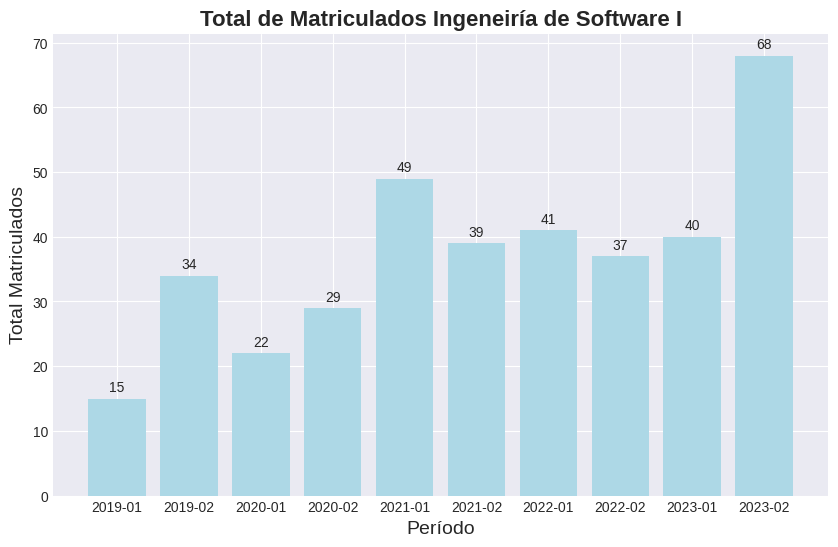

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(IS_I['PERIODO'],IS_I['MATRICULADOS'], color='lightblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Ingeneiría de Software I', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 98.21 %
R^2 prueba 42.5 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 46.57167984562573
RMSE 6.82434464587082


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[3.76, 3.70, 61]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66.41417204])

**43390851 -	SISTEMAS OPERATIVOS**

In [ ]:
SO = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390851]
SO

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
16,2018-02,43390851,SISTEMAS OPERATIVOS,3.0,4.333333,4.083333,4.166667,4.191667,4.235000,3.905000,NaN,NaN,6,6,0,1.000000
26,2019-01,43390851,SISTEMAS OPERATIVOS,3.0,3.186667,3.346667,3.400000,3.320000,4.030000,3.678333,3.440000,NaN,15,14,1,0.933333
38,2019-02,43390851,SISTEMAS OPERATIVOS,3.0,3.242857,3.628571,3.150000,3.321429,3.803333,3.641667,3.693077,NaN,14,14,0,1.000000
52,2020-01,43390851,SISTEMAS OPERATIVOS,3.0,3.775000,3.990000,4.000000,3.929500,3.985263,3.892632,3.641250,NaN,21,19,2,0.904762
70,2020-02,43390851,SISTEMAS OPERATIVOS,3.0,3.612500,3.454167,3.866667,3.666667,3.822917,3.621250,3.782105,NaN,24,22,2,0.916667
90,2021-01,43390851,SISTEMAS OPERATIVOS,3.0,3.796000,3.828000,3.428000,3.658400,3.979216,3.773137,4.113878,NaN,51,48,3,0.941176
112,2021-02,43390851,SISTEMAS OPERATIVOS,3.0,4.344444,4.330556,3.511111,4.006944,3.798333,3.688611,4.029714,NaN,37,35,2,0.945946
136,2022-01,43390851,SISTEMAS OPERATIVOS,3.0,3.331579,3.544737,3.744737,3.560789,3.911842,3.837368,4.355676,NaN,39,36,3,0.923077
160,2022-02,43390851,SISTEMAS OPERATIVOS,3.0,3.335714,3.425000,3.932143,3.704815,3.897143,3.799643,4.209259,NaN,29,25,4,0.862069
184,2023-01,43390851,SISTEMAS OPERATIVOS,3.0,3.561818,3.367273,3.634545,3.851224,3.809483,3.703448,3.946786,NaN,58,48,10,0.827586


Dividimos el dataframe

In [ ]:
y = SO["MATRICULADOS"]
X = SO[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Conjuntos de entrenamiento y prueba

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo

In [ ]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 20.61403934842982
Coefs: [-0.79015559 -4.07456094  1.02550086]


In [ ]:
coefs = pd.DataFrame(modelo.coef_.reshape(-1,1), X_train.columns,columns=['Coefs'])
coefs

,Coefs
DEFINITIVA,-0.790156
PROMEDIO SEMESTRAL,-4.074561
N_APROBADOS,1.025501


Predicción

In [ ]:
predict = modelo.predict(X_test)


Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
70,24,24.701114
184,58,51.273045
38,14,16.849693


<ipython-input-87-0a2f00925d28>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


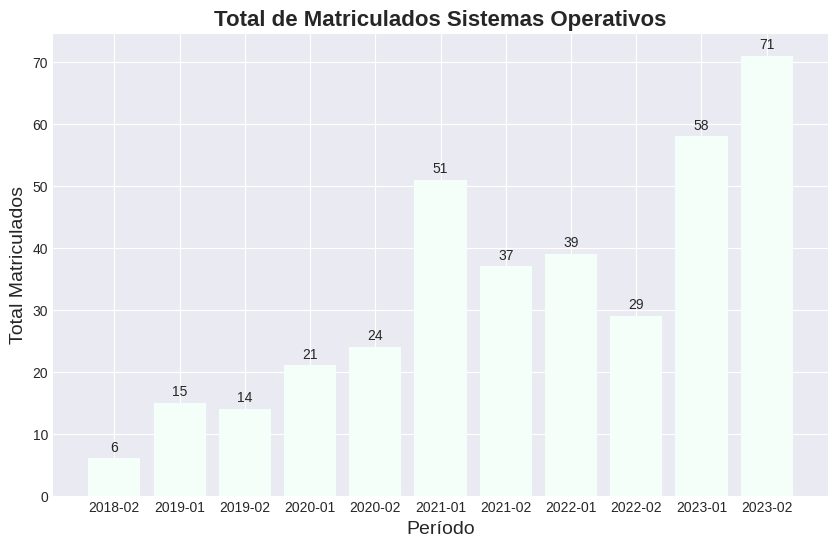

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(SO['PERIODO'],SO['MATRICULADOS'], color='mintcream')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Sistemas Operativos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.86 %
R^2 prueba 94.94 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 17.954746073350353
RMSE 4.237304104421861


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[3.74, 3.70, 67]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([71.29153985])

**43390852	- ANÁLISIS DE ALGORITMOS**

In [ ]:
AA = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390852]
AA

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
53,2020-01,43390852,ANÁLISIS DE ALGORITMOS,3.0,4.320000,3.875000,4.150000,4.118500,4.135000,3.833333,3.462105,NaN,21,20,1,0.952381
71,2020-02,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.769565,3.826087,4.360870,4.023043,3.967647,3.842941,3.974091,NaN,23,23,0,1.000000
91,2021-01,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.343333,3.353333,3.853333,3.550333,4.008889,3.763333,3.880690,NaN,30,29,1,0.966667
113,2021-02,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.694118,4.037255,3.921569,3.888039,4.080784,3.862353,3.834490,NaN,51,49,2,0.960784
137,2022-01,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.659375,3.481250,3.046875,3.525172,3.779063,3.634688,3.361935,NaN,32,28,4,0.875000
161,2022-02,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.630556,3.847222,3.747222,3.827353,3.975429,3.862571,3.592222,NaN,36,33,3,0.916667
185,2023-01,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.885714,3.842857,3.908571,3.882000,3.917105,3.660000,3.678182,NaN,39,35,4,0.897436
209,2023-02,43390852,ANÁLISIS DE ALGORITMOS,3.0,3.733929,3.605455,3.916364,3.789444,3.952143,3.801607,3.917500,NaN,56,54,2,0.964286


Dividimos el dataframe

In [ ]:
y = AA["MATRICULADOS"]
X = AA[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Conjuntos de entrenamiento y prueba

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.3 , random_state = 0)

Modelo

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 14.973813854751985
Coefs: [-8.71872487  5.48285043  0.97201018]


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
185,39,36.624982
91,30,34.187868
71,23,24.008254


<ipython-input-100-2c18b0fbf65d>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


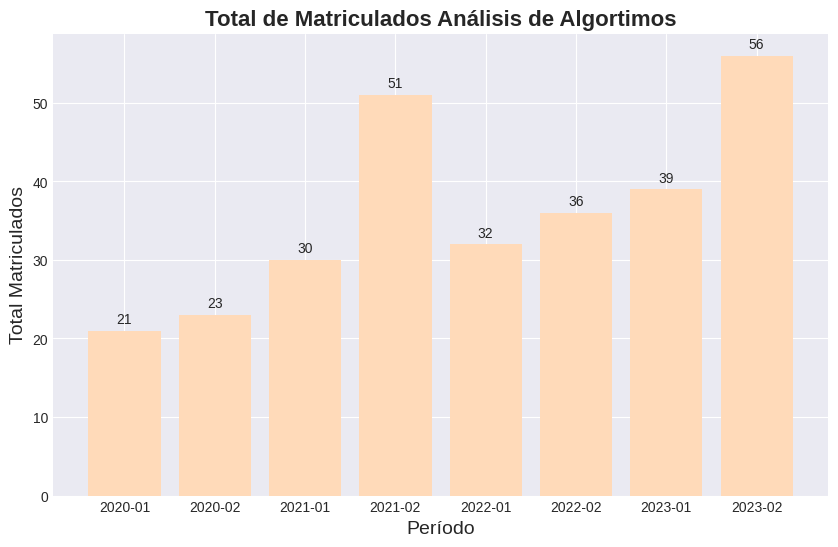

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(AA['PERIODO'],AA['MATRICULADOS'], color='peachpuff')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Análisis de Algortimos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.96000000000001 %
R^2 prueba 81.2 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 8.065173539432697
RMSE 2.8399249179217216


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[3.79, 3.95, 54]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([56.07565549])

**43390853 - INGENIERÍA DE SOFTWARE II**

In [ ]:
IS_II = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390853]
IS_II

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
39,2019-02,43390853,INGENIERÍA DE SOFTWARE II,4.0,2.871429,3.157143,3.342857,3.111429,3.984000,3.896000,3.398571,NaN,7,6,1,0.857143
54,2020-01,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.524000,3.752000,4.000000,3.782800,4.167059,3.820588,3.385600,NaN,25,25,0,1.000000
72,2020-02,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.561538,3.953846,4.061538,3.879231,4.034615,3.870769,3.240000,NaN,13,13,0,1.000000
92,2021-01,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.450000,3.766667,3.779167,3.676667,3.893810,3.668095,3.268333,NaN,24,23,1,0.958333
114,2021-02,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.683673,3.251020,3.493878,3.477959,4.097551,3.854694,3.907551,NaN,49,46,3,0.938776
138,2022-01,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.556000,3.156000,3.816000,3.540000,4.051200,3.760800,3.623043,NaN,25,25,0,1.000000
162,2022-02,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.344186,3.351163,3.600000,3.596250,3.781333,3.768222,3.608571,NaN,45,37,8,0.822222
186,2023-01,43390853,INGENIERÍA DE SOFTWARE II,4.0,4.294444,4.240000,4.300000,4.278571,3.917778,3.764444,3.495556,NaN,38,33,5,0.868421
210,2023-02,43390853,INGENIERÍA DE SOFTWARE II,4.0,3.933333,3.936111,3.830556,3.893056,3.853056,3.744444,3.589143,NaN,36,34,2,0.944444


Dividimos el dataframe

In [ ]:
y = IS_II["MATRICULADOS"]
X = IS_II[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Conjuntos de entrenamiento y prueba

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 66.20337749261195
Coefs: [ -4.64754    -12.97384688   1.1487981 ]


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
186,38,33.400234
72,13,10.764390


<ipython-input-113-7c16c35b1818>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


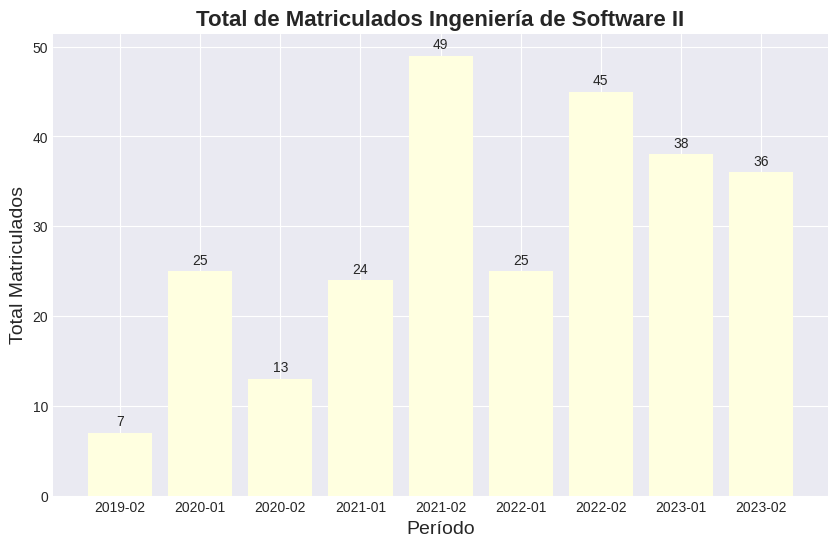

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(IS_II['PERIODO'],IS_II['MATRICULADOS'], color='lightyellow')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Ingeniería de Software II', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.11 %
R^2 prueba 91.63 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 13.077899341065681
RMSE 3.616337835582522


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[3.89, 3.85, 34]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.23427175])

**43390855 - SEÑALES Y COMUNICACIONES**

In [ ]:
SC = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390855]
SC

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
40,2019-02,43390855,SEÑALES Y COMUNICACIONES,3.0,4.350000,3.978571,4.157143,4.161429,4.095455,3.896364,3.352000,NaN,14,14,0,1.000000
55,2020-01,43390855,SEÑALES Y COMUNICACIONES,3.0,4.785000,4.660000,4.790000,4.749500,4.160000,3.825333,3.402222,NaN,20,20,0,1.000000
73,2020-02,43390855,SEÑALES Y COMUNICACIONES,3.0,4.707143,4.671429,4.578571,4.645000,3.915385,3.823077,4.035000,NaN,14,14,0,1.000000
93,2021-01,43390855,SEÑALES Y COMUNICACIONES,3.0,4.435484,4.609677,4.645161,4.571613,3.987586,3.753103,3.866000,NaN,32,31,1,0.968750
115,2021-02,43390855,SEÑALES Y COMUNICACIONES,3.0,4.670270,4.570270,4.559459,4.595946,3.968108,3.835135,3.958158,NaN,38,36,2,0.947368
139,2022-01,43390855,SEÑALES Y COMUNICACIONES,3.0,4.331707,4.553659,4.353659,4.407073,3.861190,3.736190,3.832439,NaN,42,41,1,0.976190
163,2022-02,43390855,SEÑALES Y COMUNICACIONES,3.0,4.425000,4.474286,4.147222,4.381429,3.977568,3.807838,3.580278,NaN,37,34,3,0.918919
187,2023-01,43390855,SEÑALES Y COMUNICACIONES,3.0,4.180000,4.185000,4.333333,4.332105,4.012619,3.810476,3.585500,NaN,42,38,4,0.904762
211,2023-02,43390855,SEÑALES Y COMUNICACIONES,3.0,3.962791,4.116279,3.918605,4.111707,3.760698,3.731163,3.400000,NaN,43,39,4,0.906977


Conjuntos de entrenamiento y prueba

In [ ]:
y = SC["MATRICULADOS"]
X = SC[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 4.434347678574568
Coefs: [-2.9229693   1.61484668  1.11906736]


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
187,42,40.776061
73,14,12.846844


<ipython-input-126-a612cdd5336a>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


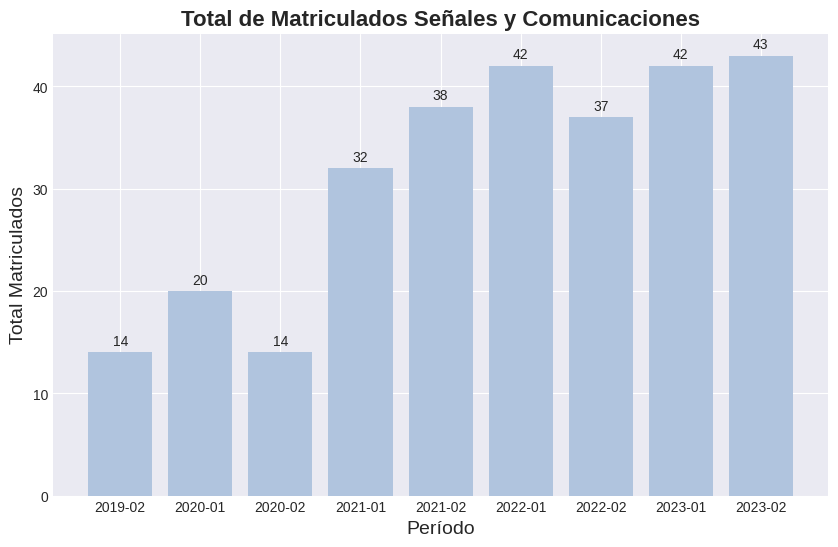

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(SC['PERIODO'],SC['MATRICULADOS'], color='lightsteelblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Señales y Comunicaciones', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.33999999999999 %
R^2 prueba 99.28 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 1.4138972160111973
RMSE 1.1890741003029195


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[4.11, 3.76, 39]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.13639444])

**40050168 - INTELIGENCIA ARTIFICIAL**

In [ ]:
IA = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 40050168]
IA

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
0,2014-01,40050168,INTELIGENCIA ARTIFICIAL,3.0,3.632353,3.632353,3.676471,3.650000,3.786129,3.558710,NaN,3.733333,34,31,3,0.911765
1,2014-02,40050168,INTELIGENCIA ARTIFICIAL,3.0,2.985714,2.771429,2.614286,2.772857,3.374074,3.438519,2.775000,3.547059,35,20,15,0.571429
2,2015-01,40050168,INTELIGENCIA ARTIFICIAL,3.0,3.038462,2.903846,2.769231,2.890385,3.283889,3.390556,2.966667,3.729167,26,15,11,0.576923
3,2015-02,40050168,INTELIGENCIA ARTIFICIAL,3.0,3.142857,3.023810,3.452381,3.230952,3.628462,3.415385,3.333333,3.800000,21,15,6,0.714286
4,2016-01,40050168,INTELIGENCIA ARTIFICIAL,3.0,3.803030,3.093750,3.390625,3.437500,3.456842,3.361579,3.095000,3.832500,33,22,11,0.666667
5,2016-02,40050168,INTELIGENCIA ARTIFICIAL,3.0,1.900000,2.500000,2.375000,2.412500,2.425000,2.890000,3.350000,3.950000,5,3,2,0.600000
6,2017-01,40050168,INTELIGENCIA ARTIFICIAL,3.0,3.108696,3.065217,3.239130,3.147826,3.567500,3.340000,2.957143,3.989474,23,16,7,0.695652
7,2017-02,40050168,INTELIGENCIA ARTIFICIAL,3.0,2.000000,3.562500,3.187500,3.018750,2.871000,3.312000,2.483333,3.983333,9,4,5,0.444444
8,2018-01,40050168,INTELIGENCIA ARTIFICIAL,3.0,2.973684,3.578947,2.736842,3.060526,3.647083,3.446667,3.058824,3.797059,19,12,7,0.631579
11,2018-02,40050168,INTELIGENCIA ARTIFICIAL,3.0,2.250000,1.958333,3.083333,2.495833,3.732500,3.233750,2.740000,3.590909,12,4,8,0.333333


Dividimos el dataframe

In [ ]:
y = IA["MATRICULADOS"]
X = IA[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Conjuntos de entrenamiento y prueba

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 12.381453841958624
Coefs: [-4.24361866  1.43934163  1.11502442]


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
176,58,57.422873
1,35,27.771439
200,44,41.874230
8,19,18.023439


<ipython-input-139-508c64469fbb>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


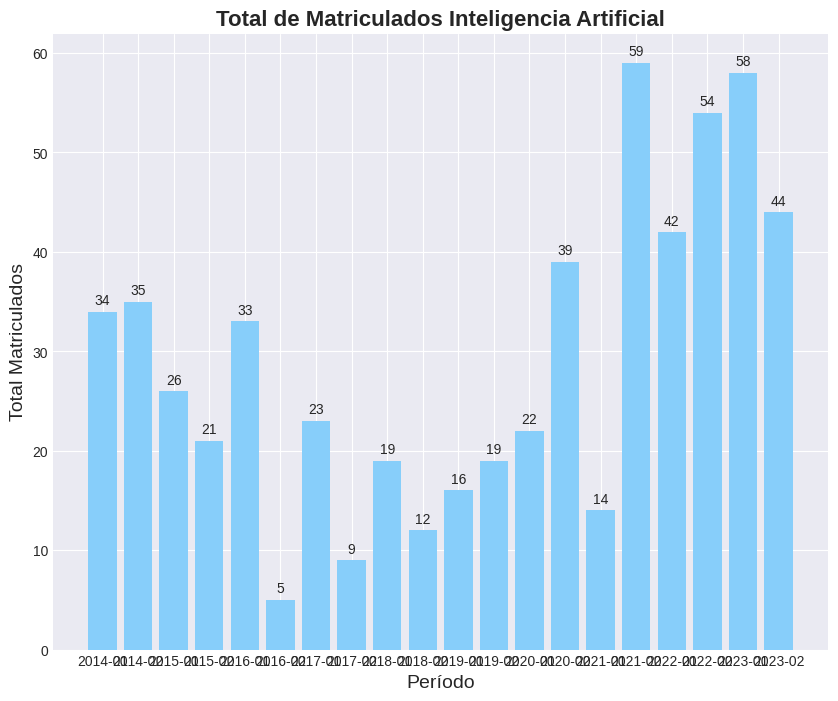

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
barras = ax.bar(IA['PERIODO'],IA['MATRICULADOS'], color='lightskyblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Inteligencia Artificial', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 96.45 %
R^2 prueba 92.75999999999999 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 14.514433818728968
RMSE 3.80978133476568


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[3.52, 3.76, 35]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41.88169533])

**43390856 - ARQUITECTURA DE SISTEMAS I**

In [ ]:
AS_I = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390856]
AS_I

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
56,2020-01,43390856,ARQUITECTURA DE SISTEMAS I,4.0,3.283333,2.983333,3.833333,3.413333,4.036667,3.851667,3.095000,NaN,6,6,0,1.000000
74,2020-02,43390856,ARQUITECTURA DE SISTEMAS I,4.0,3.233333,3.431579,3.573684,3.499474,4.060833,3.845000,3.684000,NaN,21,17,4,0.809524
94,2021-01,43390856,ARQUITECTURA DE SISTEMAS I,4.0,3.044444,2.983333,3.166667,3.075000,4.015294,3.821765,3.837059,NaN,18,11,7,0.611111
116,2021-02,43390856,ARQUITECTURA DE SISTEMAS I,4.0,3.367742,2.300000,2.622581,2.792000,3.926667,3.672963,3.796207,NaN,32,19,13,0.593750
140,2022-01,43390856,ARQUITECTURA DE SISTEMAS I,4.0,2.615385,2.758974,2.638462,2.757568,4.063250,3.845000,3.602368,NaN,40,17,23,0.425000
164,2022-02,43390856,ARQUITECTURA DE SISTEMAS I,4.0,3.140426,3.008696,3.252174,3.360465,4.054681,3.805957,3.514318,NaN,47,38,9,0.808511
188,2023-01,43390856,ARQUITECTURA DE SISTEMAS I,4.0,4.380488,4.092683,3.839024,4.077561,3.891707,3.737561,3.583902,NaN,41,39,2,0.951220
212,2023-02,43390856,ARQUITECTURA DE SISTEMAS I,4.0,4.175000,4.056818,4.052273,4.090455,3.850426,3.789574,3.936136,NaN,47,44,3,0.936170


Dividimos el dataframe

In [ ]:
y = AS_I["MATRICULADOS"]
X = AS_I[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

Conjuntos de entrenamiento y prueba

In [ ]:
#Sin escalar
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

Modelo

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

Coeficientes e intercepto

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 39.63750249301724
Coefs: [-17.85718655   5.23650592   1.31300288]


Predicción

In [ ]:
predict = modelo.predict(X_test)

Vamos a comparar las predicciones y los valores reales

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
188,41,38.409796
94,18,20.195797


<ipython-input-152-f88d1ae01ccc>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


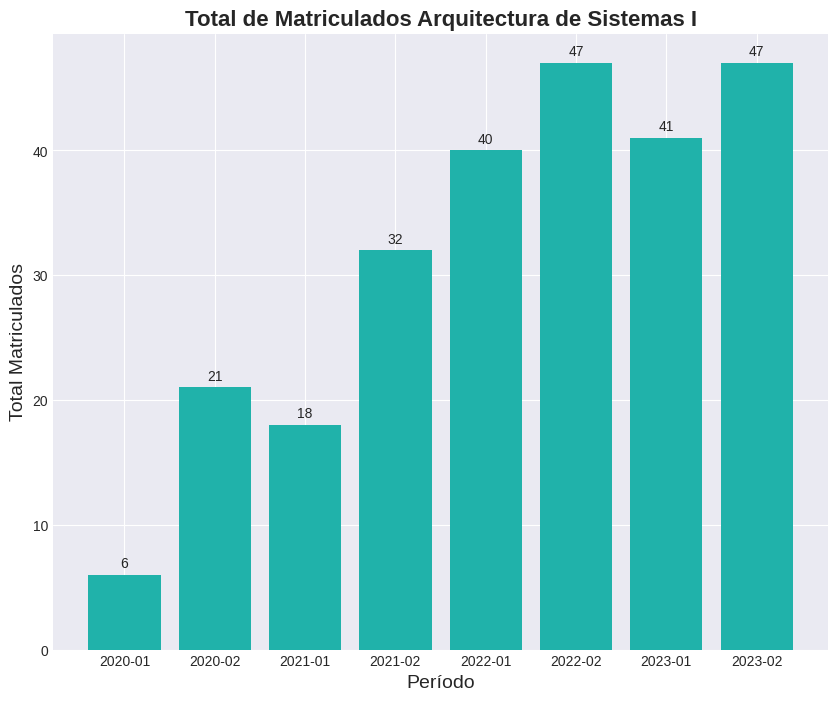

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
barras = ax.bar(AS_I['PERIODO'],AS_I['MATRICULADOS'], color='lightseagreen')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Arquitectura de Sistemas I', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

Evaluación del modelo

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 94.65 %
R^2 prueba 95.64 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 5.7653398547542265
RMSE 2.401112212028881


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

Nueva predicción

In [ ]:
new=np.array([[4.09, 3.85, 44]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([44.53428407])

**43390857 - PRÁCTICA DE INGENIERÍA III**

In [ ]:
PI_III = datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390857]
PI_III

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
41,2019-02,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,3.35,3.35,3.35,4.100000,4.267500,3.742500,4.087500,2.980000,4,2,2,0.500000
57,2020-01,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,3.90,3.90,3.80,3.860000,3.920000,3.790000,4.150000,2.600000,1,1,0,1.000000
75,2020-02,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,4.295833,4.126250,3.851250,4.064583,3.319167,24,24,0,1.000000
95,2021-01,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,4.643750,3.921875,3.789687,3.953125,3.317576,34,32,2,0.941176
117,2021-02,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,4.251852,4.053462,3.766923,4.015357,3.556800,28,26,2,0.928571
141,2022-01,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,4.376471,4.162857,3.877714,4.322727,3.875313,35,32,3,0.914286
165,2022-02,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,3.816667,3.925484,3.721290,3.693333,3.608966,31,27,4,0.870968
189,2023-01,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,4.034884,3.869091,3.828864,3.632895,3.591842,45,41,4,0.911111
213,2023-02,43390857,PRÁCTICA DE INGENIERÍA DE SISTEMAS III,2.0,NaN,NaN,NaN,3.881579,3.726364,3.752045,3.762558,3.562439,44,36,8,0.818182


In [ ]:
y = PI_III["MATRICULADOS"]
X = PI_III[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 17.017955042066504
Coefs: [-5.01099353  0.81787446  1.15360151]


In [ ]:
predict = modelo.predict(X_test)

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
189,45,47.261271
75,24,26.552753


<ipython-input-165-3763834a18c8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


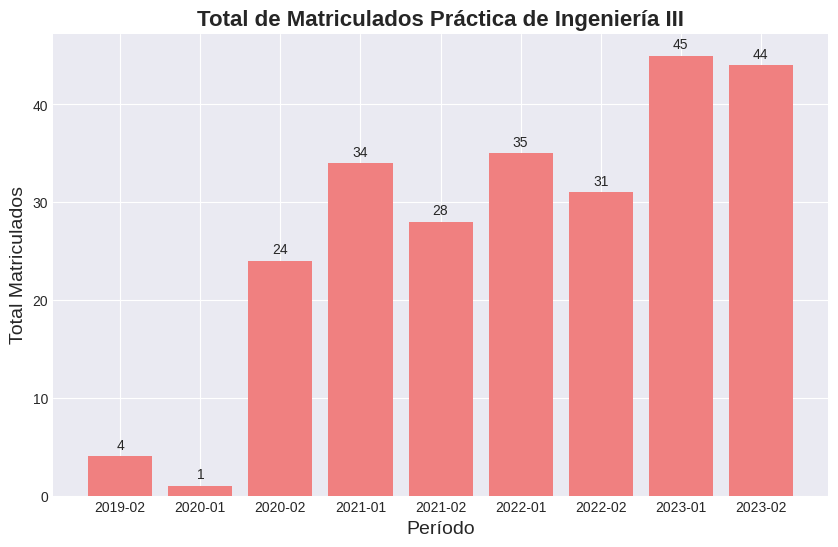

In [ ]:

import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(PI_III['PERIODO'],PI_III['MATRICULADOS'], color='lightcoral')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Práctica de Ingeniería III', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.36 %
R^2 prueba 94.73 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 5.814946686840459
RMSE 2.4114200560749386


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'N_APROBADOS'], dtype='object')

In [ ]:
new=np.array([[3.88, 3.72, 36]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([42.14744734])



------------------ cursos JR

In [ ]:
PI_V= datos1_consolidado.loc[datos1_consolidado['CÓDIGO'] == 43390865]
PI_V

,PERIODO,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,NOTAS PRIMER CORTE,NOTAS SEGUNDO CORTE,NOTAS EXAMEN,DEFINITIVA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO,NOTA DEFINITIVA PREREQUISITO 1,NOTA DEFINITIVA PREREQUISITO 2,MATRICULADOS,N_APROBADOS,REPROBADOS,TASA APROBACION
101,2021-01,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.0,NaN,NaN,NaN,4.040000,4.154000,3.756000,3.516000,NaN,5,5,0,1.000000
125,2021-02,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.0,4.3,4.1,4.246667,4.246667,4.204444,3.916667,4.373333,NaN,15,15,0,1.000000
149,2022-01,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.0,NaN,NaN,NaN,3.923529,4.177143,3.935000,4.088235,NaN,17,17,0,1.000000
173,2022-02,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.0,NaN,NaN,NaN,4.064706,4.118000,3.877333,3.905882,NaN,17,17,0,1.000000
197,2023-01,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.0,NaN,NaN,NaN,4.317857,4.117500,3.856429,3.914815,NaN,29,28,1,0.965517
221,2023-02,43390865,PRÁCTICA DE INGENIERÍA DE SISTEMAS V,2.0,NaN,NaN,NaN,3.888372,4.117727,3.865000,4.629545,NaN,44,43,1,0.977273


In [ ]:
y = PI_V["MATRICULADOS"]
X = PI_V[["DEFINITIVA", "PROMEDIO SEMESTRAL", "N_APROBADOS"]]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.2 , random_state = 0)

In [ ]:
modelo = LinearRegression().fit(X_train,y_train)
modelo

LinearRegression()

In [ ]:
print('Intercepto:', modelo.intercept_)
print('Coefs:' , modelo.coef_)

Intercepto: 36.14126395163236
Coefs: [  6.43801054 -14.8919532    0.94206941]


In [ ]:
predict = modelo.predict(X_test)

In [ ]:
comparacion = pd.DataFrame({'Real': y_test , 'Prediccion': predict})
comparacion

,Real,Prediccion
221,44,40.362627
149,17,15.210352


<ipython-input-178-3b8aafc8dd94>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo


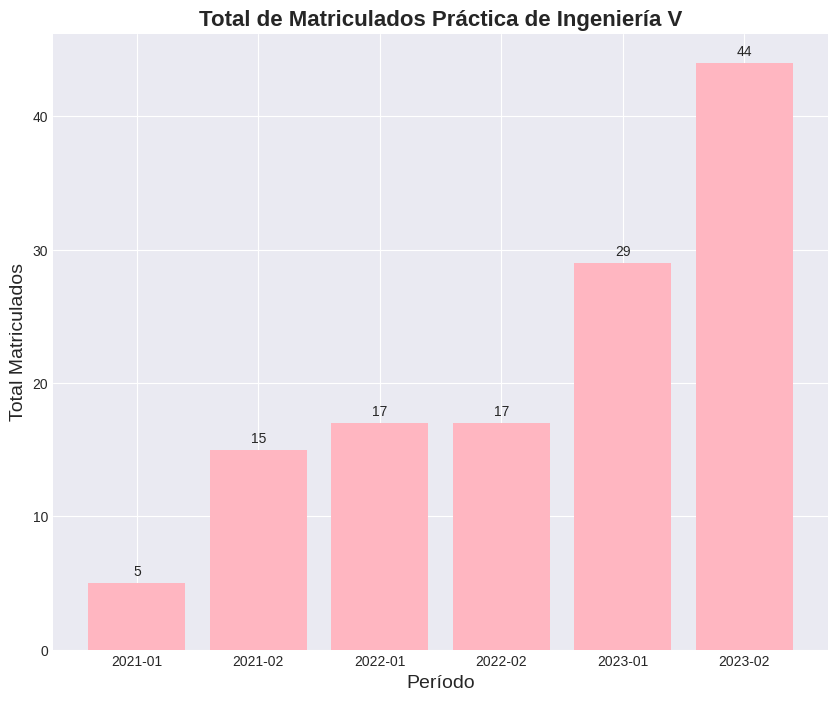

In [ ]:
import matplotlib.pyplot as plt
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 8))
barras = ax.bar(PI_V['PERIODO'],PI_V['MATRICULADOS'], color='lightpink')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Práctica de Ingeniería V', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=modelo.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=modelo.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 100.0 %
R^2 prueba 95.49 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, predict))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, predict)))

MSE 8.216660237933993
RMSE 2.866471740299212


In [ ]:
new=np.array([[3.88, 4.11, 43]])

In [ ]:
modelo.predict(new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([40.42380194])

In [ ]:
resultados_rm = pd.DataFrame({"Real":[82,71,108,112,94,107,90,90,42,42,35,31,37,36,30,42,80,86,69,62,61,55,33,56],"Prediccion":[139,128,129,90,95,79,100,76,33,48,38,48,25,35,47,44,67,71,56,37,42,42,45,42]}); resultados_rm

,Real,Prediccion
0,82,139
1,71,128
2,108,129
3,112,90
4,94,95
5,107,79
6,90,100
7,90,76
8,42,33
9,42,48


In [ ]:
import plotly.express as px

# Supongamos que tienes los valores reales y predichos almacenados en las listas y_real y y_pred
y_real = [82,71,108,112,94,107,90,90,42,42,35,31,37,36,30,42,80,86,69,62,61,55,33,5]  # Ejemplo, reemplaza con tus datos reales
y_pred = [139,128,129,90,95,79,100,76,33,48,38,48,25,35,47,44,67,71,56,37,42,42,45,42]  # Ejemplo, reemplaza con tus datos predichos


# Crear el gráfico de dispersión con Plotly Express
fig = px.scatter(resultados_rm, x='Real', y='Prediccion', title='Comparación entre Valores Reales y Predichos',
                 labels={'Real': 'Valores Reales', 'Prediccion': 'Valores Predichos'})

# Agregar la línea diagonal de igualdad
fig.add_trace(go.Scatter(x=[min(y_real), max(y_real)], y=[min(y_real), max(y_real)],
                         mode='lines', name='Predicción perfecta', line=dict(color='red', dash='dash')))

# Mostrar el gráfico
fig.show()



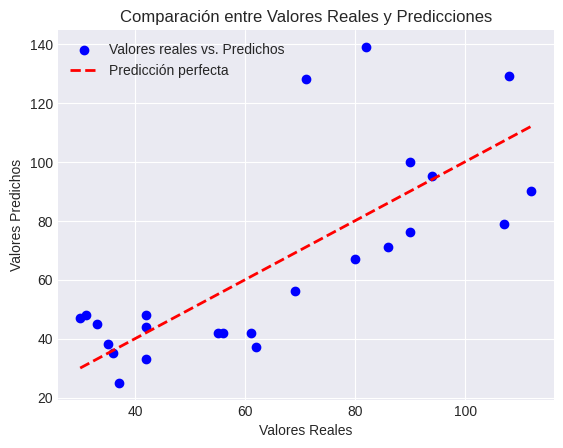

In [ ]:
# Supongamos que tienes los valores reales y predichos almacenados en las listas y_real y y_pred
y_real = [82,71,108,112,94,107,90,90,42,42,35,31,37,36,30,42,80,86,69,62,61,55,33,56]  # Ejemplo, reemplaza con tus datos reales
y_pred = [139,128,129,90,95,79,100,76,33,48,38,48,25,35,47,44,67,71,56,37,42,42,45,42]  # Ejemplo, reemplaza con tus datos predichos

# Crear un gráfico de dispersión
plt.scatter(y_real, y_pred, color='blue', marker='o', label='Valores reales vs. Predichos')

# Agregar una línea diagonal para visualizar la igualdad
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='red', linewidth=2, label='Predicción perfecta')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predicciones')

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [ ]:
import plotly.express as px
import pandas as pd

# Listas de valores reales y predichos
y_real = [82, 71, 108, 112, 94, 107, 90, 90, 42, 42, 35, 31, 37, 36, 30, 42, 80, 86, 69, 62, 61, 55, 33, 56]
y_pred = [139, 128, 129, 90, 95, 79, 100, 76, 33, 48, 38, 48, 25, 35, 47, 44, 67, 71, 56, 37, 42, 42, 45, 42]

# Crear un DataFrame
df = pd.DataFrame({"Valores Reales": y_real, "Valores Predichos": y_pred})

# Crear el gráfico de dispersión con Plotly Express
fig = px.scatter(df, x="Valores Reales", y="Valores Predichos", title="Comparación entre Valores Reales y Predicciones")

# Añadir la línea de predicción perfecta
fig.add_scatter(x=[min(y_real), max(y_real)], y=[min(y_real), max(y_real)], mode='lines', line=dict(dash='dash', color='red'), name='Predicción perfecta')

# Actualizar el layout para quitar las líneas de fondo
fig.update_layout(
    plot_bgcolor='white',  # Fondo blanco para la gráfica
    xaxis=dict(
        showgrid=False  # Quitar las líneas de la cuadrícula en el eje x
    ),
    yaxis=dict(
        showgrid=False  # Quitar las líneas de la cuadrícula en el eje y
    )
)

# Mostrar la gráfica
fig.show()


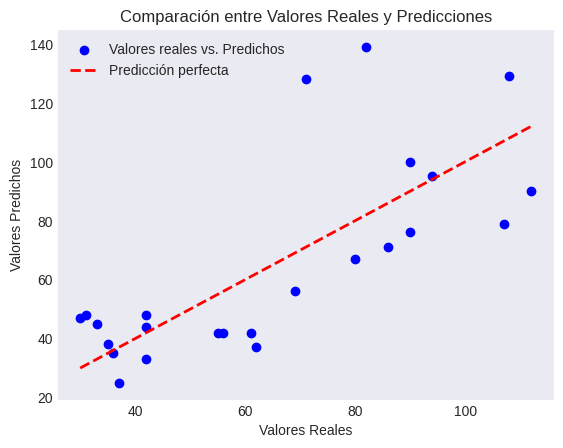

In [ ]:
import matplotlib.pyplot as plt

# Listas de valores reales y predichos
y_real = [82, 71, 108, 112, 94, 107, 90, 90, 42, 42, 35, 31, 37, 36, 30, 42, 80, 86, 69, 62, 61, 55, 33, 56]
y_pred = [139, 128, 129, 90, 95, 79, 100, 76, 33, 48, 38, 48, 25, 35, 47, 44, 67, 71, 56, 37, 42, 42, 45, 42]

# Crear un gráfico de dispersión
plt.scatter(y_real, y_pred, color='blue', marker='o', label='Valores reales vs. Predichos')

# Agregar una línea diagonal para visualizar la igualdad
plt.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='red', linewidth=2, label='Predicción perfecta')

# Etiquetas y título
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predicciones')

# Quitar las líneas de fondo (cuadrícula)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.grid(False)

# Agregar una leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


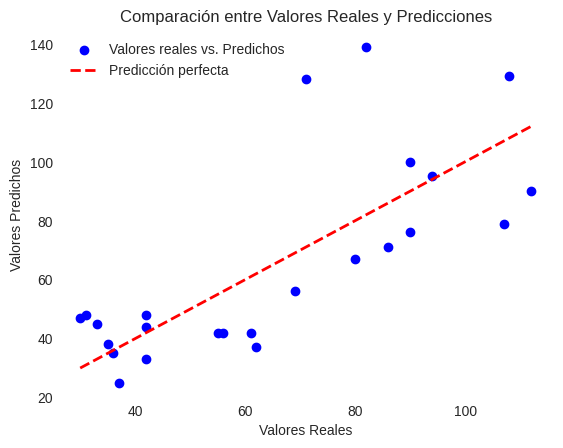

In [ ]:
import matplotlib.pyplot as plt

# Listas de valores reales y predichos
y_real = [82, 71, 108, 112, 94, 107, 90, 90, 42, 42, 35, 31, 37, 36, 30, 42, 80, 86, 69, 62, 61, 55, 33, 56]
y_pred = [139, 128, 129, 90, 95, 79, 100, 76, 33, 48, 38, 48, 25, 35, 47, 44, 67, 71, 56, 37, 42, 42, 45, 42]

# Crear el gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(y_real, y_pred, color='blue', marker='o', label='Valores reales vs. Predichos')

# Agregar una línea diagonal para visualizar la igualdad
ax.plot([min(y_real), max(y_real)], [min(y_real), max(y_real)], linestyle='--', color='red', linewidth=2, label='Predicción perfecta')

# Etiquetas y título
ax.set_xlabel('Valores Reales')
ax.set_ylabel('Valores Predichos')
ax.set_title('Comparación entre Valores Reales y Predicciones')

# Quitar las líneas de fondo (cuadrícula)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.grid(False)

# Cambiar el color de fondo a blanco
ax.set_facecolor('white')
fig.patch.set_facecolor('white')

# Agregar una leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría Analítica de Datos -AL/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V3.xlsx") #Lau

In [ ]:
datos['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS'}, inplace=True)

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()
# Crear variable APROBARON
datos1 = datos1[datos1['PLAN 4064'] == 'SI']

# Crear variable APROBARON
datos1['APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'SP' else 0)

# Crear variable NO_SUPERADO
datos1['NO_APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'NS' else 0)

# Crear variable PRERREQUISITOS
datos1['PRERREQUISITOS'] = datos1.apply(lambda row: 1 if (pd.notna(row['PREREQUISITO1_COD']) or pd.notna(row['PREREQUISITO2_COD'])) else 0, axis=1)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'NOTA DEFINITIVA PREREQUISITO 1', 'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
                   'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'NOTAS PRIMER CORTE', 'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
                   'ASIGNATURA ANULADA', 'PROMEDIO ACUMULADO']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.7,SP,3.69,1,0,1,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,3.8,SP,4.05,1,0,1,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.1,NS,3.20,0,1,1,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.0,SP,4.00,1,0,1,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,3.6,SP,4.08,1,0,1,1


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
POO1 = datos1[(datos1['CÓDIGO'] == 43390843)]
POO1.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1013692387,2.50,NS,4.93,0,1,1,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1193548613,3.60,SP,4.09,1,0,1,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1001083571,3.45,SP,NaN,1,0,1,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1024602262,2.35,NS,1.61,0,1,1,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1014304950,3.15,SP,4.22,1,0,1,1


In [ ]:
tabla_total_registros = POO1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_total_registros

,PERIODO,TOTAL_MATRICULADOS
0,2018-01,31
1,2018-02,54
2,2019-01,58
3,2019-02,71
4,2020-01,42
5,2020-02,62
6,2021-01,48
7,2021-02,77
8,2022-01,77
9,2022-02,159


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
POO = datos1[(datos1['CÓDIGO'] == 43390843)] #& (datos1['PERIODO'] != '2023-02')]
POO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1013692387,2.50,NS,4.93,0,1,1,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1193548613,3.60,SP,4.09,1,0,1,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1001083571,3.45,SP,NaN,1,0,1,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1024602262,2.35,NS,1.61,0,1,1,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1014304950,3.15,SP,4.22,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidado = POO.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()

In [ ]:
datos1_consolidado

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.941935,3.423214,20,11,31
1,2018-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.486111,3.689231,41,13,54
2,2019-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.958302,3.452586,32,21,58
3,2019-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.289687,3.790286,51,13,71
4,2020-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.092000,3.571951,29,11,42
5,2020-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.568750,3.662097,48,8,62
6,2021-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.982895,3.294792,20,23,48
7,2021-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.287746,3.321351,47,24,77
8,2022-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.159167,3.455195,53,20,77
9,2022-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.303910,3.447722,97,59,159


<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

 <FONT COLOR="blueligth"> REGRESIÓN MULTILINEAL </FONT>

Este ejercicio se basa en un conjunto de datos de la Universidad Central especificamente del programa de Ingeniería de Sistemas.

Este libro tiene datos de estudiantes de la Facultad de Ingeniería y Ciencias Básicas del Programa de Ingeniería de Sistemas. Para este *Modelo* se definen las variables independientes para predecir una variable dependiente.

𝑌\= β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +…+β
n
​
 X
n
​
 +ε

Cada fila representa una asignatura vista por el estudiante, cada columna contiene los atributos del estudiante:

- *PERIODO*:  1 si se aprueba la asignatura , 0 si no

- *CARRERA*:  1 si se aprueba la asignatura , 0 si no

- *ASIGNATURA*:  1 si se aprueba la asignatura , 0 si no

- *CRÉDITOS TEÓRICOS*:  1 si se aprueba la asignatura , 0 si no

- *TIPO ACTIVIDAD*:  1 si se aprueba la asignatura , 0 si no

- *GRUPO*:  1 si se aprueba la asignatura , 0 si no

- *DOCUMENTO DOCENTE*:  1 si se aprueba la asignatura , 0 si no

- *DOCUMENTO ESTUDIANTE*:  1 si se aprueba la asignatura , 0 si no

- *GÉNERO*:  1 si se aprueba la asignatura , 0 si no

- *NIVEL*:  1 si se aprueba la asignatura , 0 si no

- *TIPO INGRESO*:  1 si se aprueba la asignatura , 0 si no

- *SUBACCESO*:  1 si se aprueba la asignatura , 0 si no

- *PERIODO INICIO*:  1 si se aprueba la asignatura , 0 si no

- *NOTAS PRIMER CORTE*:  1 si se aprueba la asignatura , 0 si no

- *FALLAS PRIMER CORTE*:  1 si se aprueba la asignatura , 0 si no

- *NOTAS SEGUNDO CORTE*:  1 si se aprueba la asignatura , 0 si no

- *NOTAS EXAMEN*:  1 si se aprueba la asignatura , 0 si no

- *FALLAS EXAMEN*:  1 si se aprueba la asignatura , 0 si no

- *DEFINITIVA*:  1 si se aprueba la asignatura , 0 si no

- *PROMEDIO SEMESTRAL*:  1 si se aprueba la asignatura , 0 si no

- *PROMEDIO ACUMULADO*:  1 si se aprueba la asignatura , 0 si no






# <FONT COLOR="blueligth"> EXPLORACIÓN Y LIMPIEZA </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris

#Imputar
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 1.Cargar los datos
___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V3.xlsx") #Lau

## 2. Hacer una exploración de los datos.

---


In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,8.824000e+03,8035.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.341811e+07,3.742055,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.633119e+05,0.810231,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.330000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339085e+07,3.850000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.300000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


In [ ]:
datos.isnull().sum()

PLAN 4064                             0
PERIODO                               0
CARRERA                               0
DEPARTAMENTO_DEDICACION               0
CÓDIGO                                0
ASIGNATURA                            0
CRÉDITOS TEÓRICOS                     0
PREREQUISITO1_COD                 35751
PREREQUISITO1_ASIGNATURA          35751
NOTA DEFINITIVA PREREQUISITO 1    36540
PREREQUISITO2_COD                 40967
PREREQUISITO2_ASIGNATURA          40967
NOTA DEFINITIVA PREREQUISITO 2    41289
GRUPO                                 0
DESCRIPCIÓN                           0
DEPARTAMENTO PROFESOR                21
DOCUMENTO DOCENTE                     0
PRIMER APELLIDO DOCENTE               0
SEGUNDO APELLIDO DOCENTE           1947
NOMBRE DOCENTE                        0
DOCUMENTO ESTUDIANTE                  0
PRIMER APELLIDO                       0
SEGUNDO APELLIDO                    107
NOMBRE                                0
GÉNERO                                0


In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
#datos2= datos.dropna()

In [ ]:
datos['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS'}, inplace=True)

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()
# Crear variable APROBARON
datos1 = datos1[datos1['PLAN 4064'] == 'SI']

# Crear variable APROBARON
datos1['APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'SP' else 0)

# Crear variable NO_SUPERADO
datos1['NO_APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'NS' else 0)

# Crear variable PRERREQUISITOS
datos1['PRERREQUISITOS'] = datos1.apply(lambda row: 1 if (pd.notna(row['PREREQUISITO1_COD']) or pd.notna(row['PREREQUISITO2_COD'])) else 0, axis=1)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'NOTA DEFINITIVA PREREQUISITO 1', 'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
                   'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'NOTAS PRIMER CORTE', 'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
                   'ASIGNATURA ANULADA', 'PROMEDIO ACUMULADO']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.7,SP,3.69,1,0,1,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,3.8,SP,4.05,1,0,1,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.1,NS,3.20,0,1,1,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.0,SP,4.00,1,0,1,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,3.6,SP,4.08,1,0,1,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'DEFINITIVA', 'CALIFICACIÓN',
       'PROMEDIO SEMESTRAL', 'APROBARON', 'NO_APROBARON', 'PRERREQUISITOS',
       'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(8824, 13)

In [ ]:
tipos_de_datos1 = datos1.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos1[tipos_de_datos1 == 'object']
columnas_cuantitativas = tipos_de_datos1[tipos_de_datos1 != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 5
Columnas Cuantitativas (Numéricas): 8


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
POO1 = datos1[(datos1['CÓDIGO'] == 43390843)]
POO1.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1013692387,2.50,NS,4.93,0,1,1,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1193548613,3.60,SP,4.09,1,0,1,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1001083571,3.45,SP,NaN,1,0,1,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1024602262,2.35,NS,1.61,0,1,1,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1014304950,3.15,SP,4.22,1,0,1,1


In [ ]:
tabla_total_registros = POO1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_total_registros

,PERIODO,TOTAL_MATRICULADOS
0,2018-01,31
1,2018-02,54
2,2019-01,58
3,2019-02,71
4,2020-01,42
5,2020-02,62
6,2021-01,48
7,2021-02,77
8,2022-01,77
9,2022-02,159


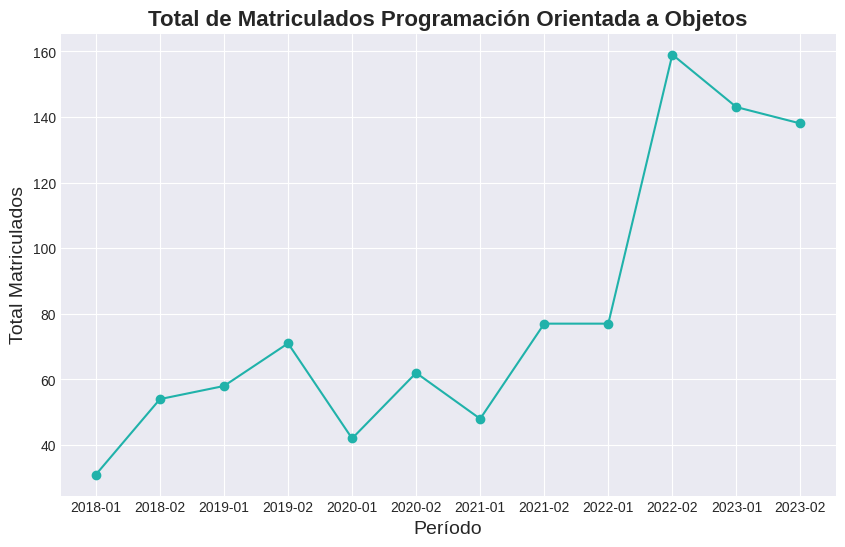

In [ ]:
import matplotlib.pyplot as plt

# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Asumiendo que tienes un DataFrame llamado tabla_total_registros con las columnas 'PERIODO' y 'TOTAL_MATRICULADOS'

# Crear el gráfico lineal temporal
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tabla_total_registros['PERIODO'], tabla_total_registros['TOTAL_MATRICULADOS'], marker='o', linestyle='-', color='lightseagreen')

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Programación Orientada a Objetos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Mostrar el gráfico
plt.show()


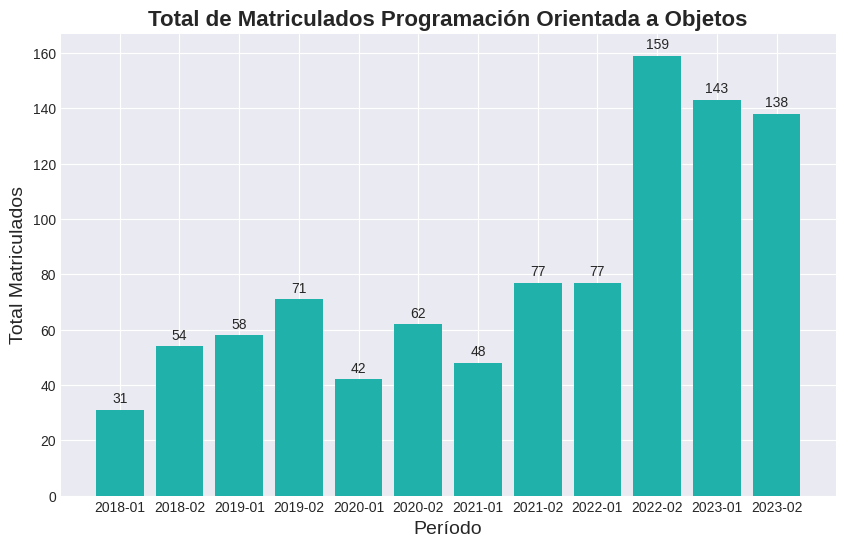

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_total_registros['PERIODO'], tabla_total_registros['TOTAL_MATRICULADOS'], color='lightseagreen')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Programación Orientada a Objetos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
POO = datos1[(datos1['CÓDIGO'] == 43390843)] #& (datos1['PERIODO'] != '2023-02')]
POO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1013692387,2.50,NS,4.93,0,1,1,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1193548613,3.60,SP,4.09,1,0,1,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1001083571,3.45,SP,NaN,1,0,1,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1024602262,2.35,NS,1.61,0,1,1,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1014304950,3.15,SP,4.22,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidado = POO.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()

In [ ]:
datos1_consolidado

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.941935,3.423214,20,11,31
1,2018-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.486111,3.689231,41,13,54
2,2019-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.958302,3.452586,32,21,58
3,2019-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.289687,3.790286,51,13,71
4,2020-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.092000,3.571951,29,11,42
5,2020-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.568750,3.662097,48,8,62
6,2021-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.982895,3.294792,20,23,48
7,2021-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.287746,3.321351,47,24,77
8,2022-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.159167,3.455195,53,20,77
9,2022-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.303910,3.447722,97,59,159


## 3. Modelo
---

In [ ]:
datos1_consolidado.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,12.0,12.0,12.000000,12.000000,12.000000,12.00000,12.00000
mean,43390843.0,1.0,3.298163,3.514322,55.833333,19.50000,80.00000
std,0.0,0.0,0.290575,0.147092,34.658944,13.46038,42.66785
min,43390843.0,1.0,2.941935,3.294792,20.000000,8.00000,31.00000
25%,43390843.0,1.0,3.064724,3.441595,31.250000,12.50000,52.50000
50%,43390843.0,1.0,3.288717,3.492489,47.500000,15.50000,66.50000
75%,43390843.0,1.0,3.506771,3.594488,64.000000,21.50000,92.25000
max,43390843.0,1.0,3.779375,3.790286,120.000000,59.00000,159.00000


In [ ]:
datos1_consolidado.columns

Index(['PERIODO', 'CÓDIGO', 'ASIGNATURA', 'PRERREQUISITOS', 'DEFINITIVA',
       'PROMEDIO SEMESTRAL', 'APROBARON', 'NO_APROBARON',
       'TOTAL_MATRICULADOS'],
      dtype='object')

___________________________________________________

In [ ]:
y = datos1_consolidado["TOTAL_MATRICULADOS"]
X = datos1_consolidado.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 148.61160001042992
Coefs: [-12.29869169 -26.91689606   1.17328396]


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 362.23408786432975
R^2: 0.8882912969168391


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 98.68 %
R^2 prueba 88.83 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 362.23408786432975
RMSE 19.032448288760165


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test,  y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,  y_pred)))

MSE 362.23408786432975
RMSE 19.032448288760165


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.73, 3.53, 112]]) #hacemos la predicción con valores nuevos, para que me prediga el numero de estudiantes matriculados

In [ ]:
model.predict(new)

array([139.1286399])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_POO = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_POO)


    Valor Real  Predicción
10         143  147.809095
9          159  128.984414
0           31   43.753019


## PRÁCTICA DE INGENIERÍA I
---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
PI1 = datos1[(datos1['CÓDIGO'] == 43390898)]
PI1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
236,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026304845,4.5,SP,3.79,1,0,1,1
237,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1030701648,4.5,SP,4.61,1,0,1,1
238,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1193548613,4.0,SP,4.09,1,0,1,1
239,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026305433,5.0,SP,3.90,1,0,1,1
240,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1001083571,4.0,SP,NaN,1,0,1,1


In [ ]:
tabla_total_registrospi1 = PI1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_total_registrospi1

,PERIODO,TOTAL_MATRICULADOS
0,2018-01,33
1,2018-02,55
2,2019-01,33
3,2019-02,59
4,2020-01,30
5,2020-02,60
6,2021-01,40
7,2021-02,66
8,2022-01,83
9,2022-02,125


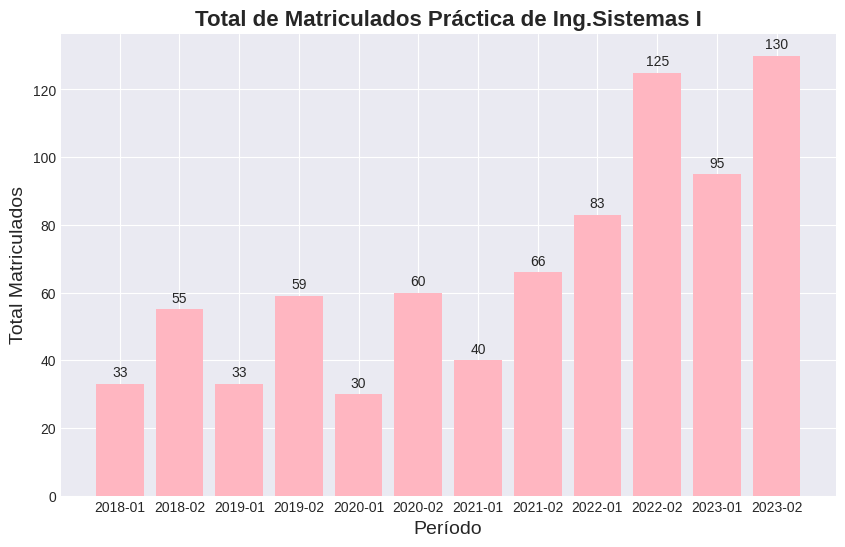

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_total_registrospi1['PERIODO'], tabla_total_registrospi1['TOTAL_MATRICULADOS'], color='lightpink')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Práctica de Ing.Sistemas I', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
PI = datos1[(datos1['CÓDIGO'] == 43390898)]
PI.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
236,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026304845,4.5,SP,3.79,1,0,1,1
237,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1030701648,4.5,SP,4.61,1,0,1,1
238,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1193548613,4.0,SP,4.09,1,0,1,1
239,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026305433,5.0,SP,3.90,1,0,1,1
240,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1001083571,4.0,SP,NaN,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoPI1 = PI.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoPI1

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.968750,3.386667,31,1,33
1,2018-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.680909,3.607407,52,3,55
2,2019-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.287097,3.486667,30,3,33
3,2019-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.169811,3.671017,53,4,59
4,2020-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.332000,3.637333,25,3,30
5,2020-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.871154,3.573000,52,3,60
6,2021-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.635946,3.549750,33,7,40
7,2021-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.854098,3.338571,51,10,66
8,2022-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.820513,3.413012,70,9,83
9,2022-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.096875,3.478720,109,12,125


In [ ]:
y = datos1_consolidadoPI1["TOTAL_MATRICULADOS"]
X = datos1_consolidadoPI1.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 78.04331177002848
Coefs: [  2.27268723 -24.82151129   1.18323508]


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 23.145560490395567
R^2: 0.984228494517447


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.33999999999999 %
R^2 prueba 98.42 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 23.145560490395567
RMSE 4.8109833184491055


In [ ]:
datos1_consolidadoPI1.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,43390898.0,1.0,4.009407,3.512874,57.833333,6.416667,67.416667
std,0.0,0.0,0.247099,0.105578,28.679525,4.010403,34.429000
min,43390898.0,1.0,3.635946,3.338571,25.000000,1.000000,30.000000
25%,43390898.0,1.0,3.845702,3.429907,32.500000,3.000000,38.250000
50%,43390898.0,1.0,3.998092,3.518208,52.000000,5.500000,59.500000
75%,43390898.0,1.0,4.199133,3.584458,72.750000,10.000000,86.000000
max,43390898.0,1.0,4.368293,3.671017,109.000000,12.000000,130.000000


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[4.02, 3.43, 107]]) #

In [ ]:
model.predict(new)

array([128.64788447])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_PI1 = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_PI1)


    Valor Real  Predicción
10          95   95.031324
9          125  129.979763
0           33   39.681142


## ESTRUCTURAS DE DATOS
---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ED1 = datos1[(datos1['CÓDIGO'] == 43390844)]
ED1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
335,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233501641,3.10,SP,3.54,1,0,1,1
336,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1003811744,4.15,SP,4.00,1,0,1,1
337,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1101696849,3.75,SP,4.33,1,0,1,1
338,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233503069,0.90,NS,1.15,0,1,1,1
339,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1032504519,3.40,SP,4.40,1,0,1,1


In [ ]:
tabla_totalED1 = ED1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalED1

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,33
1,2019-01,36
2,2019-02,43
3,2020-01,57
4,2020-02,24
5,2021-01,60
6,2021-02,40
7,2022-01,59
8,2022-02,73
9,2023-01,99


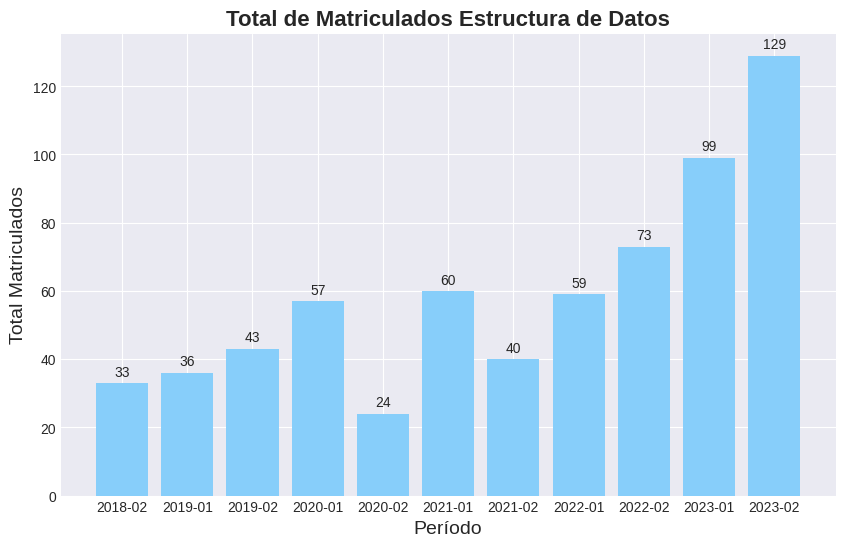

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalED1['PERIODO'], tabla_totalED1['TOTAL_MATRICULADOS'], color='lightskyblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Estructura de Datos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
ED = datos1[(datos1['CÓDIGO'] == 43390844 )] #& (datos1['PERIODO'] != '2023-02' )]
ED.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
335,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233501641,3.10,SP,3.54,1,0,1,1
336,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1003811744,4.15,SP,4.00,1,0,1,1
337,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1101696849,3.75,SP,4.33,1,0,1,1
338,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233503069,0.90,NS,1.15,0,1,1,1
339,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1032504519,3.40,SP,4.40,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoED1 = ED.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoED1

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390844,ESTRUCTURAS DE DATOS,1,3.684848,3.735517,31,2,33
1,2019-01,43390844,ESTRUCTURAS DE DATOS,1,3.656571,3.890882,32,3,36
2,2019-02,43390844,ESTRUCTURAS DE DATOS,1,3.527838,3.485714,33,7,43
3,2020-01,43390844,ESTRUCTURAS DE DATOS,1,3.998679,3.885088,51,2,57
4,2020-02,43390844,ESTRUCTURAS DE DATOS,1,3.740455,3.562083,19,3,24
5,2021-01,43390844,ESTRUCTURAS DE DATOS,1,3.562712,3.775932,44,16,60
6,2021-02,43390844,ESTRUCTURAS DE DATOS,1,3.840857,3.636923,32,4,40
7,2022-01,43390844,ESTRUCTURAS DE DATOS,1,3.984615,3.498772,50,5,59
8,2022-02,43390844,ESTRUCTURAS DE DATOS,1,4.289853,3.710685,68,4,73
9,2023-01,43390844,ESTRUCTURAS DE DATOS,1,3.946667,3.669899,82,13,99


In [ ]:
datos1_consolidadoED1.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390844.0,1.0,3.815759,3.671031,50.181818,6.909091,59.363636
std,0.0,0.0,0.224786,0.144178,26.914004,5.664884,31.219458
min,43390844.0,1.0,3.527838,3.485714,19.000000,2.000000,24.000000
25%,43390844.0,1.0,3.670710,3.545964,32.000000,3.000000,38.000000
50%,43390844.0,1.0,3.740455,3.669899,44.000000,4.000000,57.000000
75%,43390844.0,1.0,3.965641,3.755725,59.500000,10.000000,66.500000
max,43390844.0,1.0,4.289853,3.890882,110.000000,17.000000,129.000000


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 71.76074681252116
Coefs: [ -8.68085255 -10.13822117   1.1395924 ]


In [ ]:
y = datos1_consolidadoED1["TOTAL_MATRICULADOS"]
X = datos1_consolidadoED1.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 32.97328071370862
R^2: 0.9550772742320046


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.87 %
R^2 prueba 95.50999999999999 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 32.97328071370862
RMSE 5.742236560235796


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.74, 3.53, 110]])
model.predict(new)

array([128.86160159])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_ED1 = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_ED1)


   Valor Real  Predicción
5          60   52.694200
0          33   37.228985
9          99   93.740645


## PRÁCTICA DE INGENIERÍA II
---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
PI2 = datos1[(datos1['CÓDIGO'] == 43390899)]
PI2.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
456,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1233910274,3.7,SP,4.12,1,0,1,1
457,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1001083571,4.0,SP,NaN,1,0,1,1
458,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1000602748,3.8,SP,3.93,1,0,1,1
459,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1014304109,4.0,SP,4.01,1,0,1,1
460,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1007379516,4.0,SP,4.49,1,0,1,1


In [ ]:
tabla_totalPI2 = PI2.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalPI2

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,26
1,2019-01,33
2,2019-02,16
3,2020-01,49
4,2020-02,35
5,2021-01,65
6,2021-02,39
7,2022-01,41
8,2022-02,70
9,2023-01,75


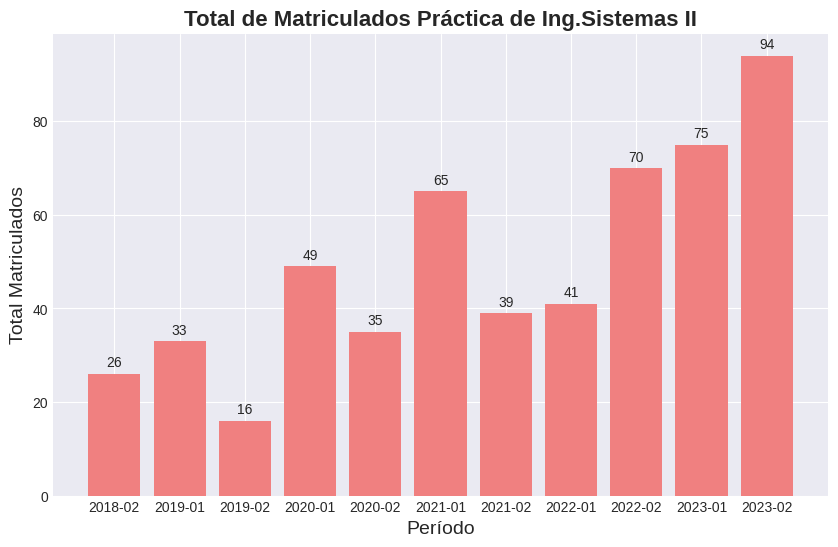

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalPI2['PERIODO'], tabla_totalPI2['TOTAL_MATRICULADOS'], color='lightcoral')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Práctica de Ing.Sistemas II', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
PIII = datos1[(datos1['CÓDIGO'] == 43390899)] #& (datos1['PERIODO'] != '2023-02')]
PIII.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
456,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1233910274,3.7,SP,4.12,1,0,1,1
457,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1001083571,4.0,SP,NaN,1,0,1,1
458,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1000602748,3.8,SP,3.93,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoPI2 = PIII.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoPI2.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.709615,3.655000,25,1,26
1,2019-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.154545,3.860333,33,0,33
2,2019-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.085714,3.566000,14,1,16
3,2020-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.295652,3.808298,44,5,49
4,2020-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.667742,3.796000,29,5,35
5,2021-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.959531,3.744615,64,1,65
6,2021-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.658974,3.799744,32,7,39
7,2022-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.357895,3.562821,38,3,41
8,2022-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.866129,3.723857,62,8,70
9,2023-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.879412,3.732162,66,7,75


In [ ]:
datos1_consolidadoPI2.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390899.0,1.0,3.987945,3.717041,44.818182,4.000000,49.363636
std,0.0,0.0,0.253803,0.099783,21.798248,2.898275,23.728770
min,43390899.0,1.0,3.658974,3.562821,14.000000,0.000000,16.000000
25%,43390899.0,1.0,3.787872,3.646809,30.500000,1.000000,34.000000
50%,43390899.0,1.0,3.959531,3.732162,38.000000,5.000000,41.000000
75%,43390899.0,1.0,4.193365,3.797872,63.000000,6.500000,67.500000
max,43390899.0,1.0,4.357895,3.860333,86.000000,8.000000,94.000000


In [ ]:
y = datos1_consolidadoPI2["TOTAL_MATRICULADOS"]
X = datos1_consolidadoPI2.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 22.693749264862728
R^2: 0.949218363156697


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.72 %
R^2 prueba 94.92 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 22.693749264862728
RMSE 4.76379567832865


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 49.43096500047072
Coefs: [-7.52490635 -5.00565984  1.10560726]


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[4.23, 3.64, 86]])
model.predict(new)

array([94.46223349])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_PI2 = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_PI2)


   Valor Real  Predicción
5          65   71.650457
0          26   30.860951
9          75   74.526900


## ARQUITECTURA DE COMPUTADORES

---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
APC1 = datos1[(datos1['CÓDIGO'] == 43390846)]
APC1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
368,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1233501641,2.75,NS,3.54,0,1,1,2
369,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007381016,3.65,SP,4.50,1,0,1,1
370,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1010248096,4.50,SP,4.28,1,0,1,1
371,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007103882,3.65,SP,4.29,1,0,1,1
372,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1026305656,1.80,NS,3.43,0,1,1,2


In [ ]:
tabla_totalAPC = APC1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalAPC

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,8
1,2019-01,18
2,2019-02,32
3,2020-01,35
4,2020-02,53
5,2021-01,35
6,2021-02,49
7,2022-01,35
8,2022-02,56
9,2023-01,69


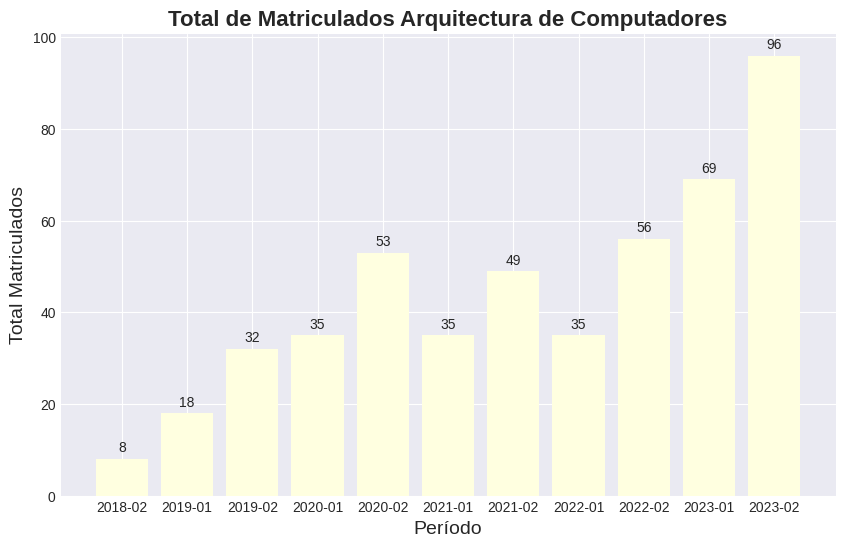

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalAPC['PERIODO'], tabla_totalAPC['TOTAL_MATRICULADOS'], color='lightyellow')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Arquitectura de Computadores', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
APC = datos1[(datos1['CÓDIGO'] == 43390846)]# & (datos1['PERIODO'] != '2023-02')]
APC.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
368,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1233501641,2.75,NS,3.54,0,1,1,2
369,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007381016,3.65,SP,4.50,1,0,1,1
370,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1010248096,4.50,SP,4.28,1,0,1,1
371,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007103882,3.65,SP,4.29,1,0,1,1
372,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1026305656,1.80,NS,3.43,0,1,1,2


In [ ]:
from itertools import count
datos1_consolidadoAPC = APC.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoAPC.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390846,ARQUITECTURA DE COMPUTADORES,1,3.281250,3.835714,6,2,8
1,2019-01,43390846,ARQUITECTURA DE COMPUTADORES,1,3.760000,3.830000,18,0,18
2,2019-02,43390846,ARQUITECTURA DE COMPUTADORES,1,3.412581,3.915484,24,8,32
3,2020-01,43390846,ARQUITECTURA DE COMPUTADORES,1,3.988286,3.814000,35,0,35
4,2020-02,43390846,ARQUITECTURA DE COMPUTADORES,1,4.173396,3.886604,52,1,53
5,2021-01,43390846,ARQUITECTURA DE COMPUTADORES,1,4.199714,3.899118,34,1,35
6,2021-02,43390846,ARQUITECTURA DE COMPUTADORES,1,4.269130,3.739792,43,3,49
7,2022-01,43390846,ARQUITECTURA DE COMPUTADORES,1,4.090571,3.796286,35,0,35
8,2022-02,43390846,ARQUITECTURA DE COMPUTADORES,1,3.767273,3.718036,53,3,56
9,2023-01,43390846,ARQUITECTURA DE COMPUTADORES,1,3.813182,3.636377,63,3,69


In [ ]:
datos1_consolidadoAPC.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390846.0,1.0,3.852944,3.792183,40.818182,2.545455,44.181818
std,0.0,0.0,0.325622,0.097089,22.229792,2.733629,24.367266
min,43390846.0,1.0,3.281250,3.636377,6.000000,0.000000,8.000000
25%,43390846.0,1.0,3.693500,3.728914,29.000000,0.500000,33.500000
50%,43390846.0,1.0,3.813182,3.814000,35.000000,2.000000,35.000000
75%,43390846.0,1.0,4.131984,3.861159,52.500000,3.000000,54.500000
max,43390846.0,1.0,4.269130,3.915484,86.000000,8.000000,96.000000


In [ ]:
y = datos1_consolidadoAPC["TOTAL_MATRICULADOS"]
X = datos1_consolidadoAPC.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2",r2)

MSE: 1.6480909890099378
RMSE 1.2837799612900715
R^2 0.9973541172135053


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 32.1466875239226
Coefs: [-6.88742148 -1.56381168  1.09362637]


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")


R^2 entrenamiento 98.64 %
R^2 prueba 99.74 %


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.62, 3.64, 86]])
model.predict(new)

array([95.57381535])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_APC = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_APC)


   Valor Real  Predicción
5          35   34.307296
0           8   10.110759
9          69   69.095550


## BASES DE DATOS

---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
BD1 = datos1[(datos1['CÓDIGO'] == 43390847)]
BD1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
376,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022440480,3.65,SP,NaN,1,0,1,1
377,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1001317329,3.80,SP,4.62,1,0,1,1
378,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022442753,4.15,SP,3.40,1,0,1,1
379,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1001342688,3.80,SP,4.61,1,0,1,1
380,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1233502105,3.80,SP,NaN,1,0,1,1


In [ ]:
tabla_totalBD = BD1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalBD

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,19
1,2019-01,25
2,2019-02,34
3,2020-01,38
4,2020-02,48
5,2021-01,34
6,2021-02,50
7,2022-01,35
8,2022-02,39
9,2023-01,66


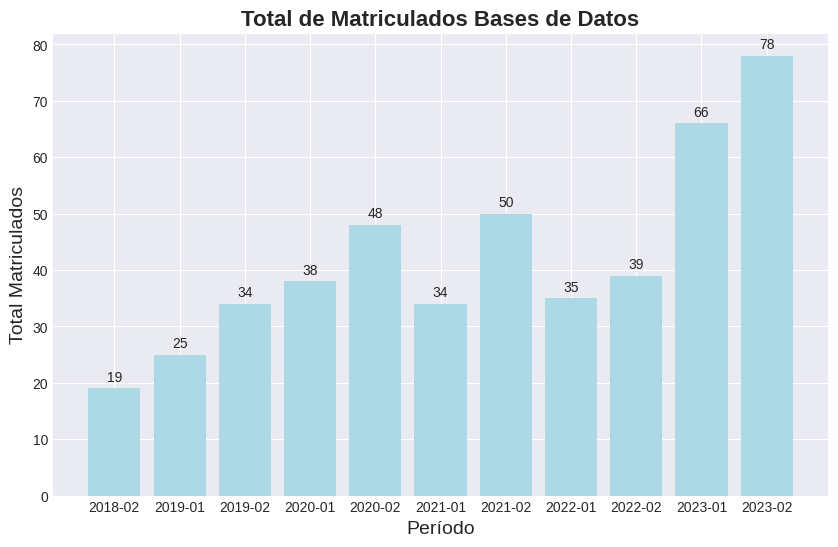

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalBD['PERIODO'],tabla_totalBD['TOTAL_MATRICULADOS'], color='lightblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Bases de Datos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
BD = datos1[(datos1['CÓDIGO'] == 43390847)]# & (datos1['PERIODO'] != '2023-02')]
BD.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
376,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022440480,3.65,SP,NaN,1,0,1,1
377,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1001317329,3.80,SP,4.62,1,0,1,1
378,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022442753,4.15,SP,3.40,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoBD = BD.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoBD.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390847,BASES DE DATOS,1,3.973684,4.133571,19,0,19
1,2019-01,43390847,BASES DE DATOS,1,4.087200,3.904500,25,0,25
2,2019-02,43390847,BASES DE DATOS,1,3.441765,3.882500,27,7,34
3,2020-01,43390847,BASES DE DATOS,1,3.680000,3.889167,35,3,38
4,2020-02,43390847,BASES DE DATOS,1,3.959565,3.853404,41,6,48
5,2021-01,43390847,BASES DE DATOS,1,3.613333,3.898182,33,1,34
6,2021-02,43390847,BASES DE DATOS,1,3.818333,3.824286,44,4,50
7,2022-01,43390847,BASES DE DATOS,1,3.811176,3.834706,29,5,35
8,2022-02,43390847,BASES DE DATOS,1,3.749231,3.607949,37,2,39
9,2023-01,43390847,BASES DE DATOS,1,3.729538,3.738333,61,4,66


In [ ]:
datos1_consolidadoBD.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390847.0,1.0,3.808578,3.853024,38.636364,3.000000,42.363636
std,0.0,0.0,0.193914,0.126992,16.225121,2.408319,17.293194
min,43390847.0,1.0,3.441765,3.607949,19.000000,0.000000,19.000000
25%,43390847.0,1.0,3.704769,3.820476,28.000000,1.000000,34.000000
50%,43390847.0,1.0,3.811176,3.853404,35.000000,3.000000,38.000000
75%,43390847.0,1.0,3.966625,3.893674,42.500000,4.500000,49.000000
max,43390847.0,1.0,4.087200,4.133571,74.000000,7.000000,78.000000


In [ ]:
y = datos1_consolidadoBD["TOTAL_MATRICULADOS"]
X = datos1_consolidadoBD.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 15.629883440476528
RMSE 3.9534647387420225
R^2: 0.9593207197905469


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: -1.7147881385887018
Coefs: [-7.14837068  8.10213583  1.06175531]


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 98.29 %
R^2 prueba 95.93 %


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[4.03,3.81, 74]])
model.predict(new)

array([78.91630827])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_BD = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_BD)


   Valor Real  Predicción
5          34   39.077290
0          19   23.543952
9          66   66.680647


## INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN

---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ITC1 = datos1[(datos1['CÓDIGO'] == 43390848)]
ITC1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
635,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1003811744,3.27,SP,4.00,1,0,1,1
636,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1007228578,3.50,SP,NaN,1,0,1,1
637,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1020842794,2.44,NS,3.61,0,1,1,3
638,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1001083571,3.26,SP,NaN,1,0,1,1
639,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1193548613,3.39,SP,4.09,1,0,1,1


In [ ]:
tabla_totalITC = ITC1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalITC

,PERIODO,TOTAL_MATRICULADOS
0,2019-01,40
1,2019-02,44
2,2020-01,48
3,2020-02,56
4,2021-01,50
5,2021-02,78
6,2022-01,47
7,2022-02,74
8,2023-01,88
9,2023-02,101


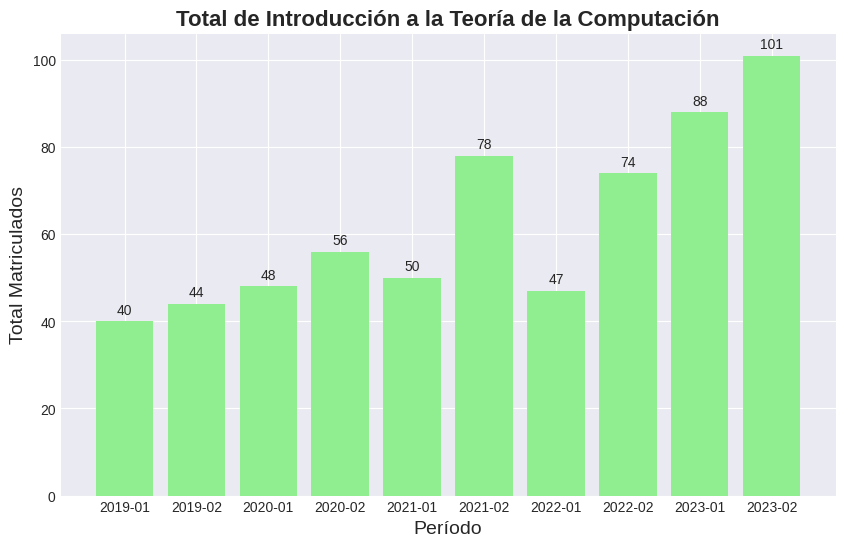

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalITC['PERIODO'],tabla_totalITC['TOTAL_MATRICULADOS'], color='lightgreen')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Introducción a la Teoría de la Computación', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
ITC = datos1[(datos1['CÓDIGO'] == 43390848)]# & (datos1['PERIODO'] != '2023-02')]
ITC.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
635,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1003811744,3.27,SP,4.00,1,0,1,1
636,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1007228578,3.50,SP,NaN,1,0,1,1
637,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1020842794,2.44,NS,3.61,0,1,1,3


In [ ]:
from itertools import count
datos1_consolidadoITC = ITC.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoITC.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2019-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.199250,4.021250,28,12,40
1,2019-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.175455,3.832368,35,9,44
2,2020-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.428723,3.859787,47,0,48
3,2020-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.210377,3.784286,41,12,56
4,2021-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.185400,3.779184,38,12,50
5,2021-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,2.690290,3.717105,38,31,78
6,2022-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.307778,3.807447,31,13,47
7,2022-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.497869,3.660946,56,13,74
8,2023-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.925679,3.586250,77,7,88
9,2023-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.970632,3.618812,95,4,101


In [ ]:
datos1_consolidadoITC.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43390848.0,1.0,3.359145,3.766743,48.600000,11.300000,62.600000
std,0.0,0.0,0.377211,0.128225,21.649737,8.165646,21.088175
min,43390848.0,1.0,2.690290,3.586250,28.000000,0.000000,40.000000
25%,43390848.0,1.0,3.188862,3.674986,35.750000,7.500000,47.250000
50%,43390848.0,1.0,3.259078,3.781735,39.500000,12.000000,53.000000
75%,43390848.0,1.0,3.480582,3.826138,53.750000,12.750000,77.000000
max,43390848.0,1.0,3.970632,4.021250,95.000000,31.000000,101.000000


In [ ]:
y = datos1_consolidadoITC["TOTAL_MATRICULADOS"]
X = datos1_consolidadoITC.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 42.14082093175166
RMSE 6.491596177501467
R^2: 0.9129321881575378


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 94.92 %
R^2 prueba 91.29 %


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 277.2368589602076
Coefs: [-34.2624017  -40.75788296   1.11391657]


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.97, 3.61,95]])
model.predict(new)

array([99.90124069])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_ITC = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_ITC)

   Valor Real  Predicción
7          74   71.521218
1          44   51.130167


## ESTILOS Y LENGUAJES DE PROGRAMACIÓN
_____________________

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ELP1 = datos1[(datos1['CÓDIGO'] == 43390849)]
ELP1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
1017,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1012465854,3.69,SP,3.80,1,0,1,1
1018,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1013671685,3.41,SP,3.78,1,0,1,1
1019,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1001083571,3.42,SP,NaN,1,0,1,1
1020,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1193548613,3.51,SP,4.09,1,0,1,1
1021,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1030701648,3.03,SP,4.61,1,0,1,1


In [ ]:
tabla_totalELP = ELP1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalELP

,PERIODO,TOTAL_MATRICULADOS
0,2019-02,20
1,2020-01,34
2,2020-02,28
3,2021-01,50
4,2021-02,37
5,2022-01,43
6,2022-02,32
7,2023-01,50
8,2023-02,75


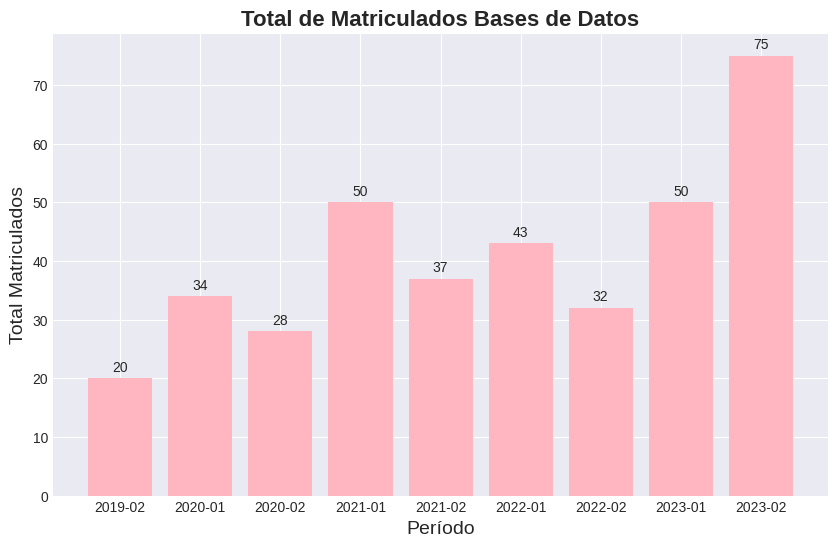

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalELP['PERIODO'],tabla_totalELP['TOTAL_MATRICULADOS'], color='lightpink')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Bases de Datos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
ELP = datos1[(datos1['CÓDIGO'] == 43390849)]# & (datos1['PERIODO'] != '2023-02')]
ELP.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
1017,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1012465854,3.69,SP,3.80,1,0,1,1
1018,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1013671685,3.41,SP,3.78,1,0,1,1
1019,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1001083571,3.42,SP,NaN,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoELP = ELP.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoELP.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2019-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.444000,4.132222,20,0,20
1,2020-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.832813,3.985185,30,3,34
2,2020-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.782857,3.865385,27,1,28
3,2021-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.937600,4.073400,50,0,50
4,2021-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.020541,3.701351,29,8,37
5,2022-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.573171,3.923810,39,3,43
6,2022-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,4.165667,3.831875,29,3,32
7,2023-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,4.041020,3.912800,49,0,50
8,2023-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.606438,3.759867,70,4,75


In [ ]:
datos1_consolidadoELP.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
mean,43390849.0,1.0,3.711567,3.909544,38.111111,2.444444,41.000000
std,0.0,0.0,0.347299,0.139687,15.656025,2.603417,16.116761
min,43390849.0,1.0,3.020541,3.701351,20.000000,0.000000,20.000000
25%,43390849.0,1.0,3.573171,3.831875,29.000000,0.000000,32.000000
50%,43390849.0,1.0,3.782857,3.912800,30.000000,3.000000,37.000000
75%,43390849.0,1.0,3.937600,3.985185,49.000000,3.000000,50.000000
max,43390849.0,1.0,4.165667,4.132222,70.000000,8.000000,75.000000


In [ ]:
y = datos1_consolidadoELP["TOTAL_MATRICULADOS"]
X = datos1_consolidadoELP.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 4.446012488647403
RMSE 2.1085569683191876
R^2: 0.9305310548648843


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)


Intercepto: 67.67058245641041
Coefs: [ -3.25252881 -13.68446214   1.01425847]


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.7 %
R^2 prueba 93.05 %


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.60, 3.75, 70]])
model.predict(new)

array([75.64283848])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_ELP = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_ELP)

   Valor Real  Predicción
1          34   30.808573
5          43   41.742370


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ARS = datos1[(datos1['CÓDIGO'] ==43390859)]
ARS.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
2140,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1016091590,4.20,SP,3.99,1,0,1,1
2141,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1015470534,4.38,SP,4.05,1,0,1,1
2142,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1013671685,4.35,SP,3.78,1,0,1,1
2143,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1031182442,4.50,SP,4.70,1,0,1,1
2798,SI,2021-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1014247772,3.77,SP,3.87,1,0,1,1


In [ ]:
tabla_totalARS = ARS.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalARS

,PERIODO,TOTAL_MATRICULADOS
0,2020-02,4
1,2021-01,15
2,2021-02,8
3,2022-01,25
4,2022-02,26
5,2023-01,37
6,2023-02,48


In [ ]:
from itertools import count
datos1_consolidadoARS = ARS.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoARS.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2020-02,43390859,ARQUITECTURA DE SISTEMAS II,1,4.357500,4.130000,4,0,4
1,2021-01,43390859,ARQUITECTURA DE SISTEMAS II,1,3.890000,4.195714,15,0,15
2,2021-02,43390859,ARQUITECTURA DE SISTEMAS II,1,3.655000,4.002500,7,1,8
3,2022-01,43390859,ARQUITECTURA DE SISTEMAS II,1,3.984400,4.102381,25,0,25
4,2022-02,43390859,ARQUITECTURA DE SISTEMAS II,1,4.034583,4.199615,21,3,26
5,2023-01,43390859,ARQUITECTURA DE SISTEMAS II,1,4.376286,4.263784,35,0,37
6,2023-02,43390859,ARQUITECTURA DE SISTEMAS II,1,4.338542,4.104583,47,1,48


In [ ]:
y = datos1_consolidadoARS["TOTAL_MATRICULADOS"]
X = datos1_consolidadoARS.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 43.92308167091237
RMSE 6.627449107380031
R^2: -0.4520026998648716


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

<table>
    <tr>
        <td><img src="https://www.mambogota.com/wp-content/uploads/2019/05/logo-uc-sello-acreditada_o1-1-320x120_0.png" width="300"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="font-size:200%;color:blue;text-align:center">      Proyecto de profundización       </h1></td>         
        <td>
            <tp><p style="font-size:99%;text-align:center">Modelo predictivo basado en métodos de machine learning para mejorar la gestión de oferta académica del pregrado en Ingeniería de Sistemas de la Universidad Central
</p></tp>
            <tp><p style="font-size:115%;text-align:center">Maestría en Analítica de Datos</p></tp>
            <tp><p style="font-size:115%;text-align:center">Prof. Nicolás Avilán</p></tp>
        </td>
    </tr>
</table>

 <FONT COLOR="blueligth"> REGRESIÓN MULTILINEAL </FONT>

Este ejercicio se basa en un conjunto de datos de la Universidad Central especificamente del programa de Ingeniería de Sistemas.

Este libro tiene datos de estudiantes de la Facultad de Ingeniería y Ciencias Básicas del Programa de Ingeniería de Sistemas. Para este *Modelo* se definen las variables independientes para predecir una variable dependiente.

𝑌\= β
0
​
 +β
1
​
 X
1
​
 +β
2
​
 X
2
​
 +…+β
n
​
 X
n
​
 +ε

Cada fila representa una asignatura vista por el estudiante, cada columna contiene los atributos del estudiante:

- *PERIODO*:  1 si se aprueba la asignatura , 0 si no

- *CARRERA*:  1 si se aprueba la asignatura , 0 si no

- *ASIGNATURA*:  1 si se aprueba la asignatura , 0 si no

- *CRÉDITOS TEÓRICOS*:  1 si se aprueba la asignatura , 0 si no

- *TIPO ACTIVIDAD*:  1 si se aprueba la asignatura , 0 si no

- *GRUPO*:  1 si se aprueba la asignatura , 0 si no

- *DOCUMENTO DOCENTE*:  1 si se aprueba la asignatura , 0 si no

- *DOCUMENTO ESTUDIANTE*:  1 si se aprueba la asignatura , 0 si no

- *GÉNERO*:  1 si se aprueba la asignatura , 0 si no

- *NIVEL*:  1 si se aprueba la asignatura , 0 si no

- *TIPO INGRESO*:  1 si se aprueba la asignatura , 0 si no

- *SUBACCESO*:  1 si se aprueba la asignatura , 0 si no

- *PERIODO INICIO*:  1 si se aprueba la asignatura , 0 si no

- *NOTAS PRIMER CORTE*:  1 si se aprueba la asignatura , 0 si no

- *FALLAS PRIMER CORTE*:  1 si se aprueba la asignatura , 0 si no

- *NOTAS SEGUNDO CORTE*:  1 si se aprueba la asignatura , 0 si no

- *NOTAS EXAMEN*:  1 si se aprueba la asignatura , 0 si no

- *FALLAS EXAMEN*:  1 si se aprueba la asignatura , 0 si no

- *DEFINITIVA*:  1 si se aprueba la asignatura , 0 si no

- *PROMEDIO SEMESTRAL*:  1 si se aprueba la asignatura , 0 si no

- *PROMEDIO ACUMULADO*:  1 si se aprueba la asignatura , 0 si no






# <FONT COLOR="blueligth"> EXPLORACIÓN Y LIMPIEZA </FONT>

In [ ]:
#librerías para manipular dataframes y arreglos
import pandas as pd
import numpy as np

# librerías para graficar
import matplotlib as plt
import plotly.express as px
import seaborn as sns

# selección de modelos y conjunto de entrenamiento
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

#métricas para modelo lineal
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Herramientas estadísticas
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt


#from beautifultable import BeautifulTable as BT


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
# Librería de gráficos
import statsmodels.api        as sm
from graphviz                 import Source
from matplotlib               import cm
from matplotlib.colors        import ListedColormap, LinearSegmentedColormap
from matplotlib.patches       import Patch

## Split y otro elementos de preprocesado
from sklearn.preprocessing    import LabelEncoder
from sklearn.model_selection  import GridSearchCV

# Para métricas
from sklearn.metrics          import roc_curve, auc,roc_auc_score

# Para los modelos de machine learning
from sklearn.naive_bayes      import GaussianNB, MultinomialNB
from sklearn.tree             import DecisionTreeClassifier, export_graphviz ## Plotear árboles.


# Para omitir los warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets         import load_iris

#Imputar
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## 1.Cargar los datos
___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
datos = pd.read_excel("/content/drive/MyDrive/Maestría 2023-2- JLA/PROYECTO DE PROFUNDIZACIÓN/Proyecto_Profundización_1/BASES DE DATOS/BASE ESTUDIANTES SISTEMAS V3.xlsx") #Lau

## 2. Hacer una exploración de los datos.

---


In [ ]:
datos.head(5)

,PLAN 4064,PERIODO,CARRERA,DEPARTAMENTO_DEDICACION,CÓDIGO,ASIGNATURA,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,PREREQUISITO1_ASIGNATURA,NOTA DEFINITIVA PREREQUISITO 1,...,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,CALIFICACIÓN,PORCENTAJE FALLAS,PERDIDA FALLAS,ASIGNATURA ANULADA,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
0,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.5,4.0,NaN,3.7,SP,20,9.6,N,3.69,3.71
1,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,5.0,NaN,3.8,SP,20,9.6,N,4.05,3.49
2,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,2.5,1.5,NaN,2.1,NS,20,9.6,N,3.20,3.47
3,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,3.0,3.0,NaN,3.0,SP,20,9.6,N,4.00,3.54
4,SI,2014-01,INGENIERÍA DE SISTEMAS,Ingeniería de Sistemas,40050168,INTELIGENCIA ARTIFICIAL,3,45190027.0,PROBABILIDAD Y ESTADÍSTICA,NaN,...,4.0,3.0,NaN,3.6,SP,20,9.6,N,4.08,3.77


In [ ]:
datos.describe()

,CÓDIGO,CRÉDITOS TEÓRICOS,PREREQUISITO1_COD,NOTA DEFINITIVA PREREQUISITO 1,PREREQUISITO2_COD,NOTA DEFINITIVA PREREQUISITO 2,DOCUMENTO DOCENTE,DOCUMENTO ESTUDIANTE,NIVEL,NOTAS PRIMER CORTE,...,NOTAS SEGUNDO CORTE,FALLAS SEGUNDO CORTE,PROMEDIO PARCIAL,NOTAS EXAMEN,FALLAS EXAMEN,DEFINITIVA,PORCENTAJE FALLAS,PERDIDA FALLAS,PROMEDIO SEMESTRAL,PROMEDIO ACUMULADO
count,4.457500e+04,44575.000000,8.824000e+03,8035.000000,3.608000e+03,3286.000000,4.457500e+04,4.457500e+04,44575.000000,37856.000000,...,37493.000000,5979.000000,44575.000000,37461.000000,5094.000000,42288.000000,44575.000000,44575.000000,39692.000000,39692.000000
mean,4.278278e+07,3.023197,4.341811e+07,3.742055,4.300636e+07,3.589976,2.037297e+08,1.334434e+09,6.620572,3.433310,...,3.405718,3.575213,2.890208,3.347949,4.528170,3.516514,19.841615,9.623511,3.498127,3.497549
std,2.140600e+06,0.619380,9.633119e+05,0.810231,1.149585e+06,0.731696,3.569108e+08,5.892320e+09,3.132116,0.988303,...,1.117736,4.990193,1.514347,1.254350,6.074158,0.942445,1.248518,2.102319,0.964592,0.561748
min,1.003002e+07,1.000000,4.005000e+07,0.000000,4.005000e+07,0.000000,2.420190e+05,1.082258e+06,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,3.200000,0.000000,0.000000
25%,4.005017e+07,3.000000,4.339080e+07,3.330000,4.339080e+07,3.200000,1.945779e+07,1.005743e+09,4.000000,3.000000,...,3.000000,0.000000,2.350000,3.000000,0.000000,3.130000,20.000000,9.600000,3.230000,3.300000
50%,4.339080e+07,3.000000,4.339085e+07,3.850000,4.339084e+07,3.640000,7.930442e+07,1.016060e+09,7.000000,3.500000,...,3.500000,2.000000,3.350000,3.500000,2.000000,3.650000,20.000000,9.600000,3.730000,3.590000
75%,4.339086e+07,3.000000,4.339086e+07,4.300000,4.339084e+07,4.070000,8.014978e+07,1.026305e+09,10.000000,4.100000,...,4.200000,4.000000,4.000000,4.200000,7.000000,4.150000,20.000000,9.600000,4.100000,3.850000
max,6.449110e+07,5.000000,4.519004e+07,5.000000,4.519004e+07,5.000000,1.136882e+09,9.912100e+10,11.000000,5.000000,...,5.000000,60.000000,5.000000,5.000000,64.000000,5.000000,20.000000,16.000000,5.000000,4.970000


In [ ]:
datos.shape

(44575, 42)

In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
tipos_de_datos = datos.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos[tipos_de_datos == 'object']
columnas_cuantitativas = tipos_de_datos[tipos_de_datos != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 21
Columnas Cuantitativas (Numéricas): 21


In [ ]:
datos.isnull().sum()

PLAN 4064                             0
PERIODO                               0
CARRERA                               0
DEPARTAMENTO_DEDICACION               0
CÓDIGO                                0
ASIGNATURA                            0
CRÉDITOS TEÓRICOS                     0
PREREQUISITO1_COD                 35751
PREREQUISITO1_ASIGNATURA          35751
NOTA DEFINITIVA PREREQUISITO 1    36540
PREREQUISITO2_COD                 40967
PREREQUISITO2_ASIGNATURA          40967
NOTA DEFINITIVA PREREQUISITO 2    41289
GRUPO                                 0
DESCRIPCIÓN                           0
DEPARTAMENTO PROFESOR                21
DOCUMENTO DOCENTE                     0
PRIMER APELLIDO DOCENTE               0
SEGUNDO APELLIDO DOCENTE           1947
NOMBRE DOCENTE                        0
DOCUMENTO ESTUDIANTE                  0
PRIMER APELLIDO                       0
SEGUNDO APELLIDO                    107
NOMBRE                                0
GÉNERO                                0


In [ ]:
datos.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'DEPARTAMENTO_DEDICACION', 'CÓDIGO',
       'ASIGNATURA', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD',
       'PREREQUISITO1_ASIGNATURA', 'NOTA DEFINITIVA PREREQUISITO 1',
       'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
       'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN',
       'DEPARTAMENTO PROFESOR', 'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE',
       'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE', 'DOCUMENTO ESTUDIANTE',
       'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL',
       'TIPO INGRESO', 'SUBACCESO', 'NOTAS PRIMER CORTE',
       'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
       'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'DEFINITIVA',
       'CALIFICACIÓN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
       'ASIGNATURA ANULADA', 'PROMEDIO SEMESTRAL', 'PROMEDIO ACUMULADO'],
      dtype='object')

In [ ]:
#datos2= datos.dropna()

In [ ]:
datos['CALIFICACIÓN'].replace({'PF': 'NS', 'IN':'NS'}, inplace=True)

In [ ]:
# Crear DataFrame datos1
datos1 = datos.copy()
# Crear variable APROBARON
datos1 = datos1[datos1['PLAN 4064'] == 'SI']

# Crear variable APROBARON
datos1['APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'SP' else 0)

# Crear variable NO_SUPERADO
datos1['NO_APROBARON'] = datos1['CALIFICACIÓN'].apply(lambda x: 1 if x == 'NS' else 0)

# Crear variable PRERREQUISITOS
datos1['PRERREQUISITOS'] = datos1.apply(lambda row: 1 if (pd.notna(row['PREREQUISITO1_COD']) or pd.notna(row['PREREQUISITO2_COD'])) else 0, axis=1)

datos1['TOTAL_MATRICULADOS'] = datos1.groupby(['DOCUMENTO ESTUDIANTE', 'CÓDIGO'])['PERIODO'].transform('count')


# Eliminar las columnas especificadas
columns_to_drop = ['DEPARTAMENTO_DEDICACION', 'CRÉDITOS TEÓRICOS', 'PREREQUISITO1_COD', 'PREREQUISITO1_ASIGNATURA',
                   'NOTA DEFINITIVA PREREQUISITO 1', 'PREREQUISITO2_COD', 'PREREQUISITO2_ASIGNATURA',
                   'NOTA DEFINITIVA PREREQUISITO 2', 'GRUPO', 'DESCRIPCIÓN', 'DEPARTAMENTO PROFESOR',
                   'DOCUMENTO DOCENTE', 'PRIMER APELLIDO DOCENTE', 'SEGUNDO APELLIDO DOCENTE', 'NOMBRE DOCENTE',
                   'PRIMER APELLIDO', 'SEGUNDO APELLIDO', 'NOMBRE', 'GÉNERO', 'NIVEL', 'TIPO INGRESO', 'SUBACCESO',
                   'NOTAS PRIMER CORTE', 'FALLAS PRIMER CORTE', 'NOTAS SEGUNDO CORTE', 'FALLAS SEGUNDO CORTE',
                   'PROMEDIO PARCIAL', 'NOTAS EXAMEN', 'FALLAS EXAMEN', 'PORCENTAJE FALLAS', 'PERDIDA FALLAS',
                   'ASIGNATURA ANULADA', 'PROMEDIO ACUMULADO']

datos1 = datos1.drop(columns=columns_to_drop)

# Mostrar DataFrame datos1 resultante
datos1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
0,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1016014851,3.7,SP,3.69,1,0,1,1
1,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1026289722,3.8,SP,4.05,1,0,1,1
2,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022327856,2.1,NS,3.20,0,1,1,2
3,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1010205208,3.0,SP,4.00,1,0,1,1
4,SI,2014-01,INGENIERÍA DE SISTEMAS,40050168,INTELIGENCIA ARTIFICIAL,1022385102,3.6,SP,4.08,1,0,1,1


In [ ]:
datos1.columns

Index(['PLAN 4064', 'PERIODO', 'CARRERA', 'CÓDIGO', 'ASIGNATURA',
       'DOCUMENTO ESTUDIANTE', 'DEFINITIVA', 'CALIFICACIÓN',
       'PROMEDIO SEMESTRAL', 'APROBARON', 'NO_APROBARON', 'PRERREQUISITOS',
       'TOTAL_MATRICULADOS'],
      dtype='object')

In [ ]:
datos1.shape

(8824, 13)

In [ ]:
tipos_de_datos1 = datos1.dtypes

# Crea una lista de columnas cualitativas (categóricas) y cuantitativas (numéricas)
columnas_cualitativas = tipos_de_datos1[tipos_de_datos1 == 'object']
columnas_cuantitativas = tipos_de_datos1[tipos_de_datos1 != 'object']


cantidad_cualitativas = len(columnas_cualitativas)
cantidad_cuantitativas = len(columnas_cuantitativas)


print("Columnas Cualitativas (Categóricas):", cantidad_cualitativas)
print("Columnas Cuantitativas (Numéricas):", cantidad_cuantitativas)

Columnas Cualitativas (Categóricas): 5
Columnas Cuantitativas (Numéricas): 8


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
POO1 = datos1[(datos1['CÓDIGO'] == 43390843)]
POO1.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1013692387,2.50,NS,4.93,0,1,1,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1193548613,3.60,SP,4.09,1,0,1,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1001083571,3.45,SP,NaN,1,0,1,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1024602262,2.35,NS,1.61,0,1,1,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1014304950,3.15,SP,4.22,1,0,1,1


In [ ]:
tabla_total_registros = POO1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_total_registros

,PERIODO,TOTAL_MATRICULADOS
0,2018-01,31
1,2018-02,54
2,2019-01,58
3,2019-02,71
4,2020-01,42
5,2020-02,62
6,2021-01,48
7,2021-02,77
8,2022-01,77
9,2022-02,159


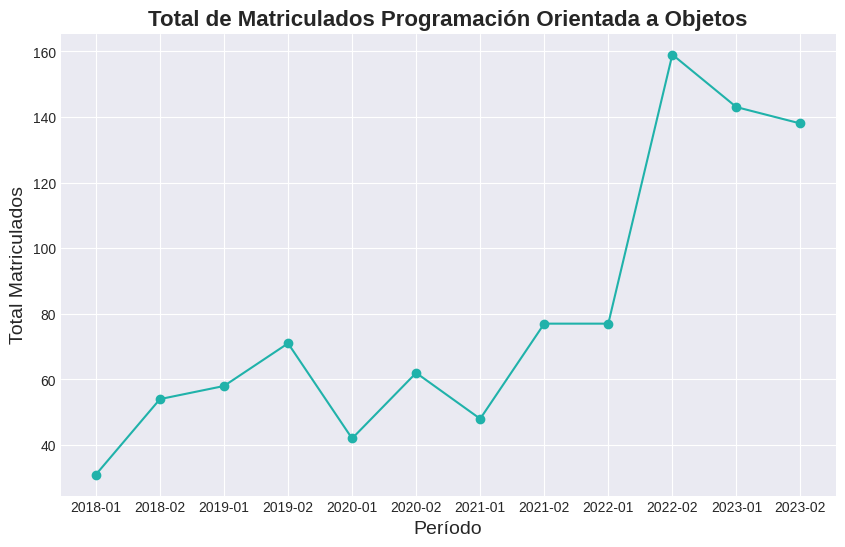

In [ ]:
import matplotlib.pyplot as plt

# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Asumiendo que tienes un DataFrame llamado tabla_total_registros con las columnas 'PERIODO' y 'TOTAL_MATRICULADOS'

# Crear el gráfico lineal temporal
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(tabla_total_registros['PERIODO'], tabla_total_registros['TOTAL_MATRICULADOS'], marker='o', linestyle='-', color='lightseagreen')

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Programación Orientada a Objetos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Mostrar el gráfico
plt.show()


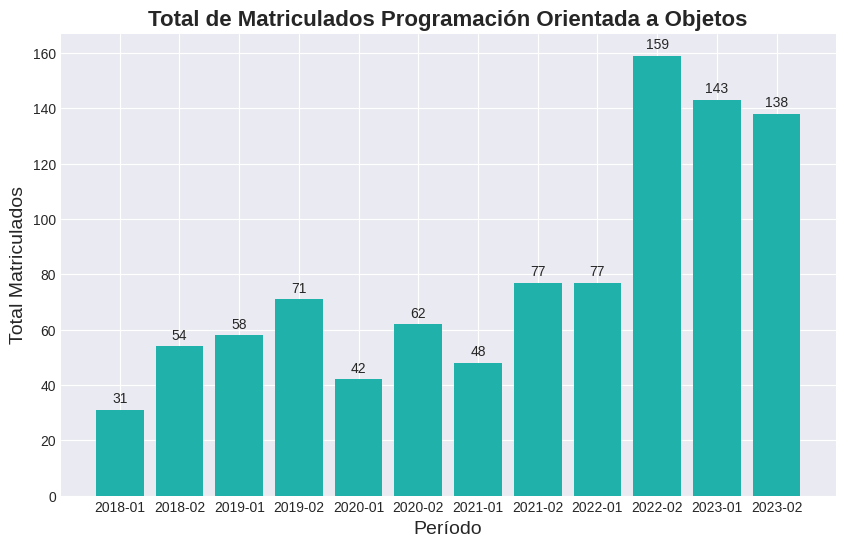

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_total_registros['PERIODO'], tabla_total_registros['TOTAL_MATRICULADOS'], color='lightseagreen')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Programación Orientada a Objetos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
POO = datos1[(datos1['CÓDIGO'] == 43390843)] #& (datos1['PERIODO'] != '2023-02')]
POO.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
205,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1013692387,2.50,NS,4.93,0,1,1,2
206,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1193548613,3.60,SP,4.09,1,0,1,1
207,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1001083571,3.45,SP,NaN,1,0,1,1
208,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1024602262,2.35,NS,1.61,0,1,1,2
209,SI,2018-01,INGENIERÍA DE SISTEMAS,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1014304950,3.15,SP,4.22,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidado = POO.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()

In [ ]:
datos1_consolidado

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.941935,3.423214,20,11,31
1,2018-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.486111,3.689231,41,13,54
2,2019-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.958302,3.452586,32,21,58
3,2019-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.289687,3.790286,51,13,71
4,2020-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.092000,3.571951,29,11,42
5,2020-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.568750,3.662097,48,8,62
6,2021-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,2.982895,3.294792,20,23,48
7,2021-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.287746,3.321351,47,24,77
8,2022-01,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.159167,3.455195,53,20,77
9,2022-02,43390843,PROGRAMACIÓN ORIENTADA A OBJETOS,1,3.303910,3.447722,97,59,159


## 3. Modelo
---

In [ ]:
datos1_consolidado.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,12.0,12.0,12.000000,12.000000,12.000000,12.00000,12.00000
mean,43390843.0,1.0,3.298163,3.514322,55.833333,19.50000,80.00000
std,0.0,0.0,0.290575,0.147092,34.658944,13.46038,42.66785
min,43390843.0,1.0,2.941935,3.294792,20.000000,8.00000,31.00000
25%,43390843.0,1.0,3.064724,3.441595,31.250000,12.50000,52.50000
50%,43390843.0,1.0,3.288717,3.492489,47.500000,15.50000,66.50000
75%,43390843.0,1.0,3.506771,3.594488,64.000000,21.50000,92.25000
max,43390843.0,1.0,3.779375,3.790286,120.000000,59.00000,159.00000


In [ ]:
datos1_consolidado.columns

Index(['PERIODO', 'CÓDIGO', 'ASIGNATURA', 'PRERREQUISITOS', 'DEFINITIVA',
       'PROMEDIO SEMESTRAL', 'APROBARON', 'NO_APROBARON',
       'TOTAL_MATRICULADOS'],
      dtype='object')

___________________________________________________

In [ ]:
y = datos1_consolidado["TOTAL_MATRICULADOS"]
X = datos1_consolidado.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 148.61160001042992
Coefs: [-12.29869169 -26.91689606   1.17328396]


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 362.23408786432975
R^2: 0.8882912969168391


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 98.68 %
R^2 prueba 88.83 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 362.23408786432975
RMSE 19.032448288760165


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test,  y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,  y_pred)))

MSE 362.23408786432975
RMSE 19.032448288760165


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.73, 3.53, 112]]) #hacemos la predicción con valores nuevos, para que me prediga el numero de estudiantes matriculados

In [ ]:
model.predict(new)

array([139.1286399])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_POO = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_POO)


    Valor Real  Predicción
10         143  147.809095
9          159  128.984414
0           31   43.753019


## PRÁCTICA DE INGENIERÍA I
---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
PI1 = datos1[(datos1['CÓDIGO'] == 43390898)]
PI1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
236,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026304845,4.5,SP,3.79,1,0,1,1
237,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1030701648,4.5,SP,4.61,1,0,1,1
238,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1193548613,4.0,SP,4.09,1,0,1,1
239,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026305433,5.0,SP,3.90,1,0,1,1
240,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1001083571,4.0,SP,NaN,1,0,1,1


In [ ]:
tabla_total_registrospi1 = PI1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_total_registrospi1

,PERIODO,TOTAL_MATRICULADOS
0,2018-01,33
1,2018-02,55
2,2019-01,33
3,2019-02,59
4,2020-01,30
5,2020-02,60
6,2021-01,40
7,2021-02,66
8,2022-01,83
9,2022-02,125


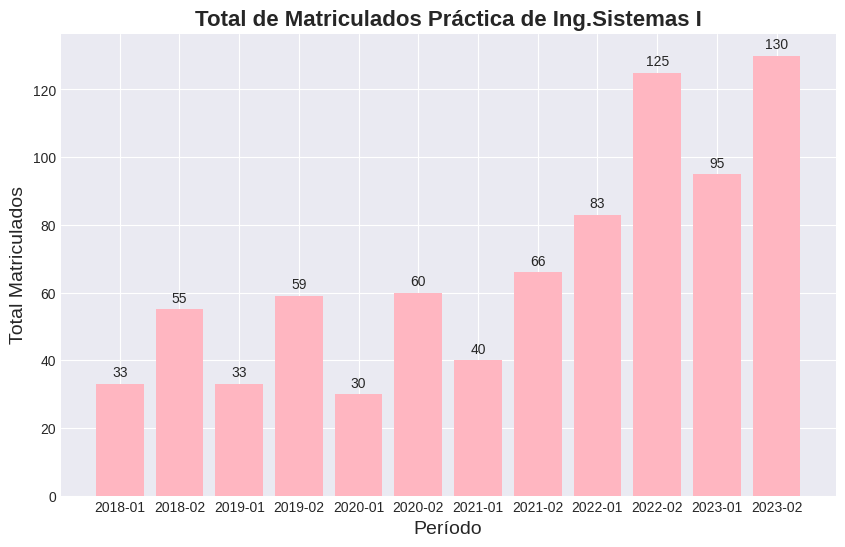

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_total_registrospi1['PERIODO'], tabla_total_registrospi1['TOTAL_MATRICULADOS'], color='lightpink')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Práctica de Ing.Sistemas I', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
PI = datos1[(datos1['CÓDIGO'] == 43390898)]
PI.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
236,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026304845,4.5,SP,3.79,1,0,1,1
237,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1030701648,4.5,SP,4.61,1,0,1,1
238,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1193548613,4.0,SP,4.09,1,0,1,1
239,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1026305433,5.0,SP,3.90,1,0,1,1
240,SI,2018-01,INGENIERÍA DE SISTEMAS,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1001083571,4.0,SP,NaN,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoPI1 = PI.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoPI1

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.968750,3.386667,31,1,33
1,2018-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.680909,3.607407,52,3,55
2,2019-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.287097,3.486667,30,3,33
3,2019-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.169811,3.671017,53,4,59
4,2020-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.332000,3.637333,25,3,30
5,2020-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.871154,3.573000,52,3,60
6,2021-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.635946,3.549750,33,7,40
7,2021-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.854098,3.338571,51,10,66
8,2022-01,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,3.820513,3.413012,70,9,83
9,2022-02,43390898,PRÁCTICA DE INGENIERÍA DE SISTEMAS I,1,4.096875,3.478720,109,12,125


In [ ]:
y = datos1_consolidadoPI1["TOTAL_MATRICULADOS"]
X = datos1_consolidadoPI1.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 78.04331177002848
Coefs: [  2.27268723 -24.82151129   1.18323508]


In [ ]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R^2:", r2)

MSE: 23.145560490395567
R^2: 0.984228494517447


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.33999999999999 %
R^2 prueba 98.42 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 23.145560490395567
RMSE 4.8109833184491055


In [ ]:
datos1_consolidadoPI1.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,12.0,12.0,12.000000,12.000000,12.000000,12.000000,12.000000
mean,43390898.0,1.0,4.009407,3.512874,57.833333,6.416667,67.416667
std,0.0,0.0,0.247099,0.105578,28.679525,4.010403,34.429000
min,43390898.0,1.0,3.635946,3.338571,25.000000,1.000000,30.000000
25%,43390898.0,1.0,3.845702,3.429907,32.500000,3.000000,38.250000
50%,43390898.0,1.0,3.998092,3.518208,52.000000,5.500000,59.500000
75%,43390898.0,1.0,4.199133,3.584458,72.750000,10.000000,86.000000
max,43390898.0,1.0,4.368293,3.671017,109.000000,12.000000,130.000000


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[4.02, 3.43, 107]]) #

In [ ]:
model.predict(new)

array([128.64788447])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_PI1 = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_PI1)


    Valor Real  Predicción
10          95   95.031324
9          125  129.979763
0           33   39.681142


## ESTRUCTURAS DE DATOS
---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ED1 = datos1[(datos1['CÓDIGO'] == 43390844)]
ED1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
335,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233501641,3.10,SP,3.54,1,0,1,1
336,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1003811744,4.15,SP,4.00,1,0,1,1
337,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1101696849,3.75,SP,4.33,1,0,1,1
338,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233503069,0.90,NS,1.15,0,1,1,1
339,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1032504519,3.40,SP,4.40,1,0,1,1


In [ ]:
tabla_totalED1 = ED1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalED1

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,33
1,2019-01,36
2,2019-02,43
3,2020-01,57
4,2020-02,24
5,2021-01,60
6,2021-02,40
7,2022-01,59
8,2022-02,73
9,2023-01,99


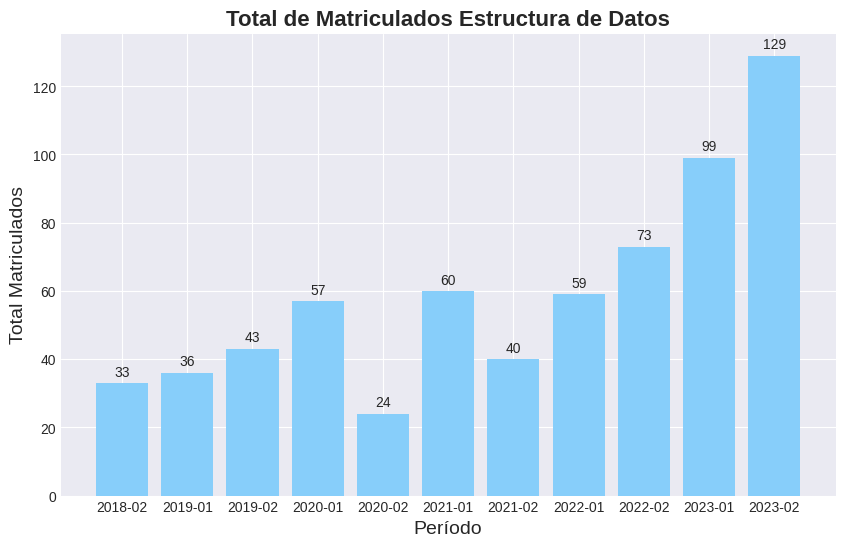

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalED1['PERIODO'], tabla_totalED1['TOTAL_MATRICULADOS'], color='lightskyblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Estructura de Datos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()


In [ ]:
ED = datos1[(datos1['CÓDIGO'] == 43390844 )] #& (datos1['PERIODO'] != '2023-02' )]
ED.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
335,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233501641,3.10,SP,3.54,1,0,1,1
336,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1003811744,4.15,SP,4.00,1,0,1,1
337,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1101696849,3.75,SP,4.33,1,0,1,1
338,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1233503069,0.90,NS,1.15,0,1,1,1
339,SI,2018-02,INGENIERÍA DE SISTEMAS,43390844,ESTRUCTURAS DE DATOS,1032504519,3.40,SP,4.40,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoED1 = ED.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoED1

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390844,ESTRUCTURAS DE DATOS,1,3.684848,3.735517,31,2,33
1,2019-01,43390844,ESTRUCTURAS DE DATOS,1,3.656571,3.890882,32,3,36
2,2019-02,43390844,ESTRUCTURAS DE DATOS,1,3.527838,3.485714,33,7,43
3,2020-01,43390844,ESTRUCTURAS DE DATOS,1,3.998679,3.885088,51,2,57
4,2020-02,43390844,ESTRUCTURAS DE DATOS,1,3.740455,3.562083,19,3,24
5,2021-01,43390844,ESTRUCTURAS DE DATOS,1,3.562712,3.775932,44,16,60
6,2021-02,43390844,ESTRUCTURAS DE DATOS,1,3.840857,3.636923,32,4,40
7,2022-01,43390844,ESTRUCTURAS DE DATOS,1,3.984615,3.498772,50,5,59
8,2022-02,43390844,ESTRUCTURAS DE DATOS,1,4.289853,3.710685,68,4,73
9,2023-01,43390844,ESTRUCTURAS DE DATOS,1,3.946667,3.669899,82,13,99


In [ ]:
datos1_consolidadoED1.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390844.0,1.0,3.815759,3.671031,50.181818,6.909091,59.363636
std,0.0,0.0,0.224786,0.144178,26.914004,5.664884,31.219458
min,43390844.0,1.0,3.527838,3.485714,19.000000,2.000000,24.000000
25%,43390844.0,1.0,3.670710,3.545964,32.000000,3.000000,38.000000
50%,43390844.0,1.0,3.740455,3.669899,44.000000,4.000000,57.000000
75%,43390844.0,1.0,3.965641,3.755725,59.500000,10.000000,66.500000
max,43390844.0,1.0,4.289853,3.890882,110.000000,17.000000,129.000000


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 71.76074681252116
Coefs: [ -8.68085255 -10.13822117   1.1395924 ]


In [ ]:
y = datos1_consolidadoED1["TOTAL_MATRICULADOS"]
X = datos1_consolidadoED1.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 32.97328071370862
R^2: 0.9550772742320046


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.87 %
R^2 prueba 95.50999999999999 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 32.97328071370862
RMSE 5.742236560235796


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.74, 3.53, 110]])
model.predict(new)

array([128.86160159])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_ED1 = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_ED1)


   Valor Real  Predicción
5          60   52.694200
0          33   37.228985
9          99   93.740645


## PRÁCTICA DE INGENIERÍA II
---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
PI2 = datos1[(datos1['CÓDIGO'] == 43390899)]
PI2.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
456,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1233910274,3.7,SP,4.12,1,0,1,1
457,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1001083571,4.0,SP,NaN,1,0,1,1
458,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1000602748,3.8,SP,3.93,1,0,1,1
459,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1014304109,4.0,SP,4.01,1,0,1,1
460,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1007379516,4.0,SP,4.49,1,0,1,1


In [ ]:
tabla_totalPI2 = PI2.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalPI2

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,26
1,2019-01,33
2,2019-02,16
3,2020-01,49
4,2020-02,35
5,2021-01,65
6,2021-02,39
7,2022-01,41
8,2022-02,70
9,2023-01,75


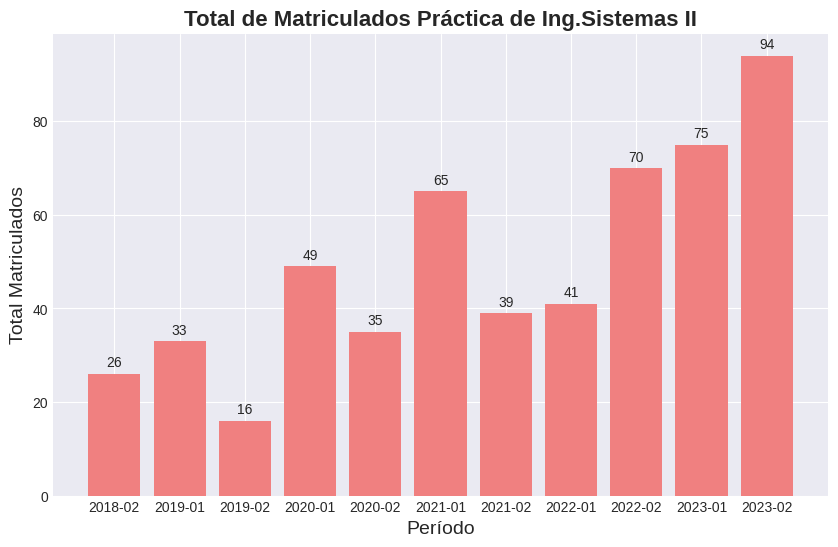

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalPI2['PERIODO'], tabla_totalPI2['TOTAL_MATRICULADOS'], color='lightcoral')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Práctica de Ing.Sistemas II', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
PIII = datos1[(datos1['CÓDIGO'] == 43390899)] #& (datos1['PERIODO'] != '2023-02')]
PIII.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
456,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1233910274,3.7,SP,4.12,1,0,1,1
457,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1001083571,4.0,SP,NaN,1,0,1,1
458,SI,2018-02,INGENIERÍA DE SISTEMAS,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1000602748,3.8,SP,3.93,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoPI2 = PIII.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoPI2.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.709615,3.655000,25,1,26
1,2019-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.154545,3.860333,33,0,33
2,2019-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.085714,3.566000,14,1,16
3,2020-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.295652,3.808298,44,5,49
4,2020-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.667742,3.796000,29,5,35
5,2021-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.959531,3.744615,64,1,65
6,2021-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.658974,3.799744,32,7,39
7,2022-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,4.357895,3.562821,38,3,41
8,2022-02,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.866129,3.723857,62,8,70
9,2023-01,43390899,PRÁCTICA DE INGENIERÍA DE SISTEMAS II,1,3.879412,3.732162,66,7,75


In [ ]:
datos1_consolidadoPI2.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390899.0,1.0,3.987945,3.717041,44.818182,4.000000,49.363636
std,0.0,0.0,0.253803,0.099783,21.798248,2.898275,23.728770
min,43390899.0,1.0,3.658974,3.562821,14.000000,0.000000,16.000000
25%,43390899.0,1.0,3.787872,3.646809,30.500000,1.000000,34.000000
50%,43390899.0,1.0,3.959531,3.732162,38.000000,5.000000,41.000000
75%,43390899.0,1.0,4.193365,3.797872,63.000000,6.500000,67.500000
max,43390899.0,1.0,4.357895,3.860333,86.000000,8.000000,94.000000


In [ ]:
y = datos1_consolidadoPI2["TOTAL_MATRICULADOS"]
X = datos1_consolidadoPI2.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("R^2:", r2)

MSE: 22.693749264862728
R^2: 0.949218363156697


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.72 %
R^2 prueba 94.92 %


In [ ]:
from sklearn import metrics
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE 22.693749264862728
RMSE 4.76379567832865


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 49.43096500047072
Coefs: [-7.52490635 -5.00565984  1.10560726]


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[4.23, 3.64, 86]])
model.predict(new)

array([94.46223349])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_PI2 = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_PI2)


   Valor Real  Predicción
5          65   71.650457
0          26   30.860951
9          75   74.526900


## ARQUITECTURA DE COMPUTADORES

---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
APC1 = datos1[(datos1['CÓDIGO'] == 43390846)]
APC1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
368,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1233501641,2.75,NS,3.54,0,1,1,2
369,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007381016,3.65,SP,4.50,1,0,1,1
370,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1010248096,4.50,SP,4.28,1,0,1,1
371,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007103882,3.65,SP,4.29,1,0,1,1
372,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1026305656,1.80,NS,3.43,0,1,1,2


In [ ]:
tabla_totalAPC = APC1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalAPC

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,8
1,2019-01,18
2,2019-02,32
3,2020-01,35
4,2020-02,53
5,2021-01,35
6,2021-02,49
7,2022-01,35
8,2022-02,56
9,2023-01,69


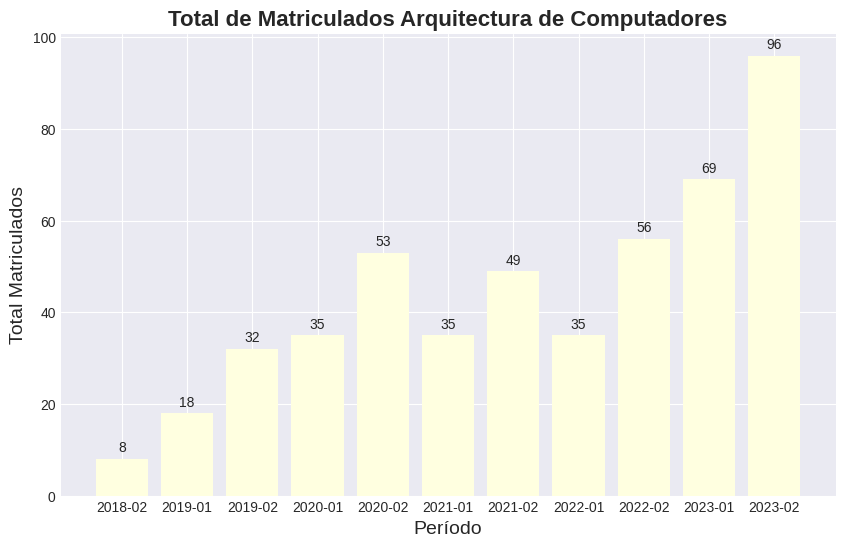

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalAPC['PERIODO'], tabla_totalAPC['TOTAL_MATRICULADOS'], color='lightyellow')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Arquitectura de Computadores', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
APC = datos1[(datos1['CÓDIGO'] == 43390846)]# & (datos1['PERIODO'] != '2023-02')]
APC.head()

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
368,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1233501641,2.75,NS,3.54,0,1,1,2
369,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007381016,3.65,SP,4.50,1,0,1,1
370,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1010248096,4.50,SP,4.28,1,0,1,1
371,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1007103882,3.65,SP,4.29,1,0,1,1
372,SI,2018-02,INGENIERÍA DE SISTEMAS,43390846,ARQUITECTURA DE COMPUTADORES,1026305656,1.80,NS,3.43,0,1,1,2


In [ ]:
from itertools import count
datos1_consolidadoAPC = APC.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoAPC.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390846,ARQUITECTURA DE COMPUTADORES,1,3.281250,3.835714,6,2,8
1,2019-01,43390846,ARQUITECTURA DE COMPUTADORES,1,3.760000,3.830000,18,0,18
2,2019-02,43390846,ARQUITECTURA DE COMPUTADORES,1,3.412581,3.915484,24,8,32
3,2020-01,43390846,ARQUITECTURA DE COMPUTADORES,1,3.988286,3.814000,35,0,35
4,2020-02,43390846,ARQUITECTURA DE COMPUTADORES,1,4.173396,3.886604,52,1,53
5,2021-01,43390846,ARQUITECTURA DE COMPUTADORES,1,4.199714,3.899118,34,1,35
6,2021-02,43390846,ARQUITECTURA DE COMPUTADORES,1,4.269130,3.739792,43,3,49
7,2022-01,43390846,ARQUITECTURA DE COMPUTADORES,1,4.090571,3.796286,35,0,35
8,2022-02,43390846,ARQUITECTURA DE COMPUTADORES,1,3.767273,3.718036,53,3,56
9,2023-01,43390846,ARQUITECTURA DE COMPUTADORES,1,3.813182,3.636377,63,3,69


In [ ]:
datos1_consolidadoAPC.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390846.0,1.0,3.852944,3.792183,40.818182,2.545455,44.181818
std,0.0,0.0,0.325622,0.097089,22.229792,2.733629,24.367266
min,43390846.0,1.0,3.281250,3.636377,6.000000,0.000000,8.000000
25%,43390846.0,1.0,3.693500,3.728914,29.000000,0.500000,33.500000
50%,43390846.0,1.0,3.813182,3.814000,35.000000,2.000000,35.000000
75%,43390846.0,1.0,4.131984,3.861159,52.500000,3.000000,54.500000
max,43390846.0,1.0,4.269130,3.915484,86.000000,8.000000,96.000000


In [ ]:
y = datos1_consolidadoAPC["TOTAL_MATRICULADOS"]
X = datos1_consolidadoAPC.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2",r2)

MSE: 1.6480909890099378
RMSE 1.2837799612900715
R^2 0.9973541172135053


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 32.1466875239226
Coefs: [-6.88742148 -1.56381168  1.09362637]


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")


R^2 entrenamiento 98.64 %
R^2 prueba 99.74 %


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.62, 3.64, 86]])
model.predict(new)

array([95.57381535])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_APC = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_APC)


   Valor Real  Predicción
5          35   34.307296
0           8   10.110759
9          69   69.095550


## BASES DE DATOS

---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
BD1 = datos1[(datos1['CÓDIGO'] == 43390847)]
BD1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
376,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022440480,3.65,SP,NaN,1,0,1,1
377,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1001317329,3.80,SP,4.62,1,0,1,1
378,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022442753,4.15,SP,3.40,1,0,1,1
379,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1001342688,3.80,SP,4.61,1,0,1,1
380,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1233502105,3.80,SP,NaN,1,0,1,1


In [ ]:
tabla_totalBD = BD1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalBD

,PERIODO,TOTAL_MATRICULADOS
0,2018-02,19
1,2019-01,25
2,2019-02,34
3,2020-01,38
4,2020-02,48
5,2021-01,34
6,2021-02,50
7,2022-01,35
8,2022-02,39
9,2023-01,66


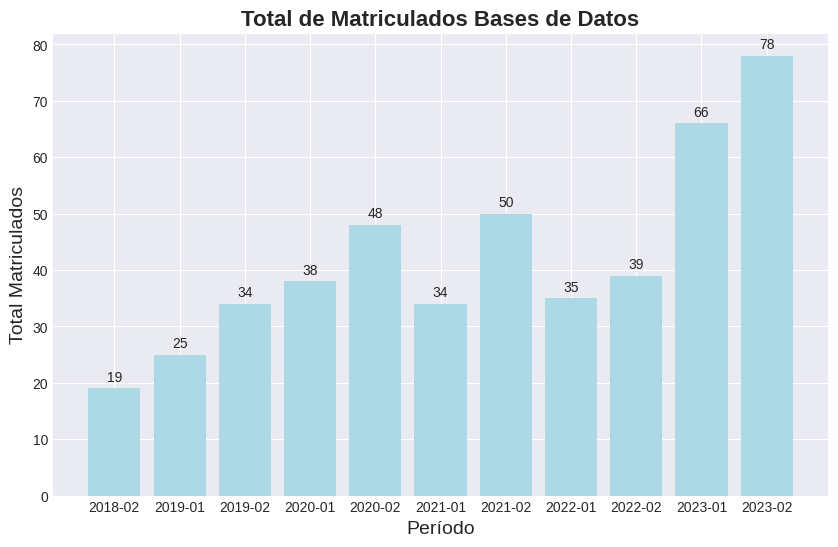

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalBD['PERIODO'],tabla_totalBD['TOTAL_MATRICULADOS'], color='lightblue')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Bases de Datos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
BD = datos1[(datos1['CÓDIGO'] == 43390847)]# & (datos1['PERIODO'] != '2023-02')]
BD.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
376,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022440480,3.65,SP,NaN,1,0,1,1
377,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1001317329,3.80,SP,4.62,1,0,1,1
378,SI,2018-02,INGENIERÍA DE SISTEMAS,43390847,BASES DE DATOS,1022442753,4.15,SP,3.40,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoBD = BD.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoBD.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2018-02,43390847,BASES DE DATOS,1,3.973684,4.133571,19,0,19
1,2019-01,43390847,BASES DE DATOS,1,4.087200,3.904500,25,0,25
2,2019-02,43390847,BASES DE DATOS,1,3.441765,3.882500,27,7,34
3,2020-01,43390847,BASES DE DATOS,1,3.680000,3.889167,35,3,38
4,2020-02,43390847,BASES DE DATOS,1,3.959565,3.853404,41,6,48
5,2021-01,43390847,BASES DE DATOS,1,3.613333,3.898182,33,1,34
6,2021-02,43390847,BASES DE DATOS,1,3.818333,3.824286,44,4,50
7,2022-01,43390847,BASES DE DATOS,1,3.811176,3.834706,29,5,35
8,2022-02,43390847,BASES DE DATOS,1,3.749231,3.607949,37,2,39
9,2023-01,43390847,BASES DE DATOS,1,3.729538,3.738333,61,4,66


In [ ]:
datos1_consolidadoBD.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,11.0,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,43390847.0,1.0,3.808578,3.853024,38.636364,3.000000,42.363636
std,0.0,0.0,0.193914,0.126992,16.225121,2.408319,17.293194
min,43390847.0,1.0,3.441765,3.607949,19.000000,0.000000,19.000000
25%,43390847.0,1.0,3.704769,3.820476,28.000000,1.000000,34.000000
50%,43390847.0,1.0,3.811176,3.853404,35.000000,3.000000,38.000000
75%,43390847.0,1.0,3.966625,3.893674,42.500000,4.500000,49.000000
max,43390847.0,1.0,4.087200,4.133571,74.000000,7.000000,78.000000


In [ ]:
y = datos1_consolidadoBD["TOTAL_MATRICULADOS"]
X = datos1_consolidadoBD.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 15.629883440476528
RMSE 3.9534647387420225
R^2: 0.9593207197905469


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: -1.7147881385887018
Coefs: [-7.14837068  8.10213583  1.06175531]


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 98.29 %
R^2 prueba 95.93 %


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[4.03,3.81, 74]])
model.predict(new)

array([78.91630827])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_BD = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_BD)


   Valor Real  Predicción
5          34   39.077290
0          19   23.543952
9          66   66.680647


## INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN

---

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ITC1 = datos1[(datos1['CÓDIGO'] == 43390848)]
ITC1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
635,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1003811744,3.27,SP,4.00,1,0,1,1
636,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1007228578,3.50,SP,NaN,1,0,1,1
637,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1020842794,2.44,NS,3.61,0,1,1,3
638,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1001083571,3.26,SP,NaN,1,0,1,1
639,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1193548613,3.39,SP,4.09,1,0,1,1


In [ ]:
tabla_totalITC = ITC1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalITC

,PERIODO,TOTAL_MATRICULADOS
0,2019-01,40
1,2019-02,44
2,2020-01,48
3,2020-02,56
4,2021-01,50
5,2021-02,78
6,2022-01,47
7,2022-02,74
8,2023-01,88
9,2023-02,101


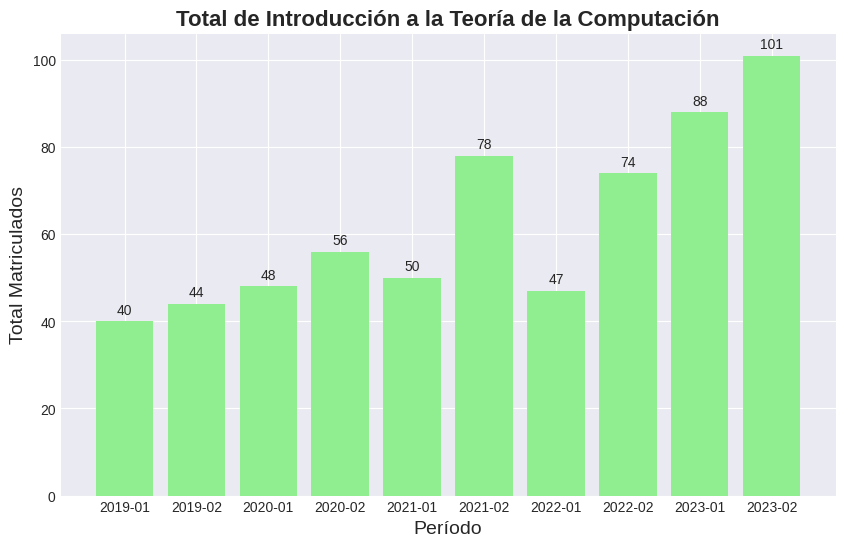

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalITC['PERIODO'],tabla_totalITC['TOTAL_MATRICULADOS'], color='lightgreen')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Introducción a la Teoría de la Computación', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
ITC = datos1[(datos1['CÓDIGO'] == 43390848)]# & (datos1['PERIODO'] != '2023-02')]
ITC.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
635,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1003811744,3.27,SP,4.00,1,0,1,1
636,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1007228578,3.50,SP,NaN,1,0,1,1
637,SI,2019-01,INGENIERÍA DE SISTEMAS,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1020842794,2.44,NS,3.61,0,1,1,3


In [ ]:
from itertools import count
datos1_consolidadoITC = ITC.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoITC.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2019-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.199250,4.021250,28,12,40
1,2019-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.175455,3.832368,35,9,44
2,2020-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.428723,3.859787,47,0,48
3,2020-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.210377,3.784286,41,12,56
4,2021-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.185400,3.779184,38,12,50
5,2021-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,2.690290,3.717105,38,31,78
6,2022-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.307778,3.807447,31,13,47
7,2022-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.497869,3.660946,56,13,74
8,2023-01,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.925679,3.586250,77,7,88
9,2023-02,43390848,INTRODUCCIÓN A LA TEORÍA DE LA COMPUTACIÓN,1,3.970632,3.618812,95,4,101


In [ ]:
datos1_consolidadoITC.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,10.0,10.0,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43390848.0,1.0,3.359145,3.766743,48.600000,11.300000,62.600000
std,0.0,0.0,0.377211,0.128225,21.649737,8.165646,21.088175
min,43390848.0,1.0,2.690290,3.586250,28.000000,0.000000,40.000000
25%,43390848.0,1.0,3.188862,3.674986,35.750000,7.500000,47.250000
50%,43390848.0,1.0,3.259078,3.781735,39.500000,12.000000,53.000000
75%,43390848.0,1.0,3.480582,3.826138,53.750000,12.750000,77.000000
max,43390848.0,1.0,3.970632,4.021250,95.000000,31.000000,101.000000


In [ ]:
y = datos1_consolidadoITC["TOTAL_MATRICULADOS"]
X = datos1_consolidadoITC.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 42.14082093175166
RMSE 6.491596177501467
R^2: 0.9129321881575378


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 94.92 %
R^2 prueba 91.29 %


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)

Intercepto: 277.2368589602076
Coefs: [-34.2624017  -40.75788296   1.11391657]


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.97, 3.61,95]])
model.predict(new)

array([99.90124069])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_ITC = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_ITC)

   Valor Real  Predicción
7          74   71.521218
1          44   51.130167


## ESTILOS Y LENGUAJES DE PROGRAMACIÓN
_____________________

In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ELP1 = datos1[(datos1['CÓDIGO'] == 43390849)]
ELP1.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
1017,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1012465854,3.69,SP,3.80,1,0,1,1
1018,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1013671685,3.41,SP,3.78,1,0,1,1
1019,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1001083571,3.42,SP,NaN,1,0,1,1
1020,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1193548613,3.51,SP,4.09,1,0,1,1
1021,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1030701648,3.03,SP,4.61,1,0,1,1


In [ ]:
tabla_totalELP = ELP1.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalELP

,PERIODO,TOTAL_MATRICULADOS
0,2019-02,20
1,2020-01,34
2,2020-02,28
3,2021-01,50
4,2021-02,37
5,2022-01,43
6,2022-02,32
7,2023-01,50
8,2023-02,75


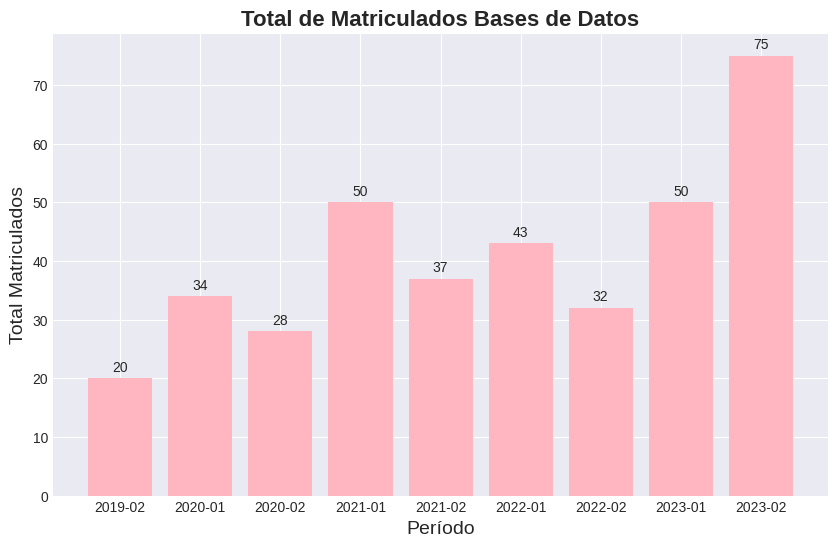

In [ ]:
# Configurar el estilo del gráfico
plt.style.use('seaborn-darkgrid')  # Estilo moderno con grilla de fondo

# Crear el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
barras = ax.bar(tabla_totalELP['PERIODO'],tabla_totalELP['TOTAL_MATRICULADOS'], color='lightpink')  # 'mintcream' es un color verde menta suave

# Añadir un título y etiquetas a los ejes
ax.set_title('Total de Matriculados Bases de Datos', fontsize=16, fontweight='bold')
ax.set_xlabel('Período', fontsize=14)
ax.set_ylabel('Total Matriculados', fontsize=14)

# Añadir valor de las etiquetas en cada barra
for barra in barras:
    altura = barra.get_height()
    ax.annotate(f'{altura}',
                xy=(barra.get_x() + barra.get_width() / 2, altura),
                xytext=(0, 3),  # 3 puntos verticales de offset
                textcoords="offset points",
                ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

In [ ]:
ELP = datos1[(datos1['CÓDIGO'] == 43390849)]# & (datos1['PERIODO'] != '2023-02')]
ELP.head(3)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
1017,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1012465854,3.69,SP,3.80,1,0,1,1
1018,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1013671685,3.41,SP,3.78,1,0,1,1
1019,SI,2019-02,INGENIERÍA DE SISTEMAS,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1001083571,3.42,SP,NaN,1,0,1,1


In [ ]:
from itertools import count
datos1_consolidadoELP = ELP.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoELP.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2019-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.444000,4.132222,20,0,20
1,2020-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.832813,3.985185,30,3,34
2,2020-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.782857,3.865385,27,1,28
3,2021-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.937600,4.073400,50,0,50
4,2021-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.020541,3.701351,29,8,37
5,2022-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.573171,3.923810,39,3,43
6,2022-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,4.165667,3.831875,29,3,32
7,2023-01,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,4.041020,3.912800,49,0,50
8,2023-02,43390849,ESTILOS Y LENGUAJES DE PROGRAMACIÓN,1,3.606438,3.759867,70,4,75


In [ ]:
datos1_consolidadoELP.describe()

,CÓDIGO,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
count,9.0,9.0,9.000000,9.000000,9.000000,9.000000,9.000000
mean,43390849.0,1.0,3.711567,3.909544,38.111111,2.444444,41.000000
std,0.0,0.0,0.347299,0.139687,15.656025,2.603417,16.116761
min,43390849.0,1.0,3.020541,3.701351,20.000000,0.000000,20.000000
25%,43390849.0,1.0,3.573171,3.831875,29.000000,0.000000,32.000000
50%,43390849.0,1.0,3.782857,3.912800,30.000000,3.000000,37.000000
75%,43390849.0,1.0,3.937600,3.985185,49.000000,3.000000,50.000000
max,43390849.0,1.0,4.165667,4.132222,70.000000,8.000000,75.000000


In [ ]:
y = datos1_consolidadoELP["TOTAL_MATRICULADOS"]
X = datos1_consolidadoELP.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 4.446012488647403
RMSE 2.1085569683191876
R^2: 0.9305310548648843


In [ ]:
print('Intercepto:', model.intercept_)
print('Coefs:' , model.coef_)


Intercepto: 67.67058245641041
Coefs: [ -3.25252881 -13.68446214   1.01425847]


In [ ]:
from sklearn.metrics import r2_score
# r^2 conjunto de entrenamiento
y_pred_train=model.predict(X_train)
# r^2 conjunto de prueba
y_pred_test=model.predict(X_test)
print("R^2 entrenamiento",np.round(r2_score(y_train, y_pred_train),4)*100, "%")
print("R^2 prueba",np.round(r2_score(y_test, y_pred_test),4)*100, "%")

R^2 entrenamiento 99.7 %
R^2 prueba 93.05 %


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')

In [ ]:
new=np.array([[3.60, 3.75, 70]])
model.predict(new)

array([75.64283848])

In [ ]:
# Crear un DataFrame con las predicciones y los valores reales
comparativo_ELP = pd.DataFrame({'Valor Real': y_test, 'Predicción': y_pred})

# Mostrar el cuadro comparativo
print(comparativo_ELP)

   Valor Real  Predicción
1          34   30.808573
5          43   41.742370


In [ ]:
# Filtrar por CÓDIGO y excluir PERIODO '2023-02'
ARS = datos1[(datos1['CÓDIGO'] ==43390859)]
ARS.head(5)

,PLAN 4064,PERIODO,CARRERA,CÓDIGO,ASIGNATURA,DOCUMENTO ESTUDIANTE,DEFINITIVA,CALIFICACIÓN,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,PRERREQUISITOS,TOTAL_MATRICULADOS
2140,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1016091590,4.20,SP,3.99,1,0,1,1
2141,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1015470534,4.38,SP,4.05,1,0,1,1
2142,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1013671685,4.35,SP,3.78,1,0,1,1
2143,SI,2020-02,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1031182442,4.50,SP,4.70,1,0,1,1
2798,SI,2021-01,INGENIERÍA DE SISTEMAS,43390859,ARQUITECTURA DE SISTEMAS II,1014247772,3.77,SP,3.87,1,0,1,1


In [ ]:
tabla_totalARS = ARS.groupby('PERIODO')['TOTAL_MATRICULADOS'].count().reset_index()
tabla_totalARS

,PERIODO,TOTAL_MATRICULADOS
0,2020-02,4
1,2021-01,15
2,2021-02,8
3,2022-01,25
4,2022-02,26
5,2023-01,37
6,2023-02,48


In [ ]:
from itertools import count
datos1_consolidadoARS = ARS.groupby(['PERIODO', 'CÓDIGO']).agg({
    'ASIGNATURA': 'first',
    'PRERREQUISITOS' : 'first',
    'DEFINITIVA': 'mean',
    'PROMEDIO SEMESTRAL':'mean',
    'APROBARON' : 'sum',
    'NO_APROBARON' : 'sum',
    'TOTAL_MATRICULADOS': 'count'
}).reset_index()
datos1_consolidadoARS.head(11)

,PERIODO,CÓDIGO,ASIGNATURA,PRERREQUISITOS,DEFINITIVA,PROMEDIO SEMESTRAL,APROBARON,NO_APROBARON,TOTAL_MATRICULADOS
0,2020-02,43390859,ARQUITECTURA DE SISTEMAS II,1,4.357500,4.130000,4,0,4
1,2021-01,43390859,ARQUITECTURA DE SISTEMAS II,1,3.890000,4.195714,15,0,15
2,2021-02,43390859,ARQUITECTURA DE SISTEMAS II,1,3.655000,4.002500,7,1,8
3,2022-01,43390859,ARQUITECTURA DE SISTEMAS II,1,3.984400,4.102381,25,0,25
4,2022-02,43390859,ARQUITECTURA DE SISTEMAS II,1,4.034583,4.199615,21,3,26
5,2023-01,43390859,ARQUITECTURA DE SISTEMAS II,1,4.376286,4.263784,35,0,37
6,2023-02,43390859,ARQUITECTURA DE SISTEMAS II,1,4.338542,4.104583,47,1,48


In [ ]:
y = datos1_consolidadoARS["TOTAL_MATRICULADOS"]
X = datos1_consolidadoARS.drop(columns = ['PERIODO', 'CÓDIGO', 'ASIGNATURA','NO_APROBARON','TOTAL_MATRICULADOS','PRERREQUISITOS'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2:", r2)

MSE: 43.92308167091237
RMSE 6.627449107380031
R^2: -0.4520026998648716


In [ ]:
X_train.columns

Index(['DEFINITIVA', 'PROMEDIO SEMESTRAL', 'APROBARON'], dtype='object')